In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import f1_score,accuracy_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier

In [2]:
train_data=pd.read_csv(r"C:\Users\jakha\Downloads\hr analytic full\train_LZdllcl.csv")
test_data=pd.read_csv(r"C:\Users\jakha\Downloads\hr analytic full\test_2umaH9m.csv")
sample_submision=pd.read_csv(r"C:\Users\jakha\Downloads\hr analytic full\sample_submission_M0L0uXE.csv")
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
train_data.shape,test_data.shape,sample_submision.shape

((54808, 14), (23490, 13), (23490, 2))

In [5]:
full_data=pd.concat([train_data,test_data])
full_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [6]:
full_data.shape

(78298, 14)

# lets explore the data


In [7]:
full_data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

* null values are present in education,previous year ratings

# Univarient analysis

# feature 1 :: employee id

In [8]:
len(full_data.employee_id.unique())

78298

* all values are unique in employee id so it is not informative for me

In [9]:
full_data.drop('employee_id',axis=1,inplace=True)
full_data.shape

(78298, 13)

# feature 2 :: department

In [10]:
full_data.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

* there are 8 unique departments 

In [11]:
full_data.department.value_counts([0])*100

Sales & Marketing    30.850086
Operations           20.577793
Procurement          12.973511
Technology           12.962017
Analytics             9.797185
Finance               4.632302
HR                    4.473933
Legal                 1.895323
R&D                   1.837850
Name: department, dtype: float64

* sales and marketing have 30 persent of total  workers ,legal and R & D have only 1.83 percent worker

In [12]:
full_data.department.isnull().sum() # no null value persent

0

# feature :: 3 region 

In [13]:
len(full_data.region.unique())# 34 unique region are given in the columns

34

In [14]:
full_data.region.value_counts([0])*100 # except 1 or 2 regions all other regions have very few population

region_2     22.531865
region_22    11.707834
region_7      8.716698
region_15     5.029503
region_13     4.872411
region_26     4.177629
region_31     3.549261
region_4      3.164832
region_27     3.025620
region_16     2.624588
region_28     2.443230
region_11     2.408746
region_23     2.159698
region_29     1.798258
region_32     1.759943
region_19     1.639889
region_14     1.503231
region_20     1.501954
region_17     1.477688
region_25     1.476411
region_5      1.415106
region_6      1.261846
region_30     1.187770
region_8      1.180107
region_10     1.171167
region_1      1.083042
region_24     0.928504
region_12     0.913178
region_9      0.766303
region_21     0.753531
region_3      0.629646
region_34     0.570896
region_33     0.504483
region_18     0.065136
Name: region, dtype: float64

<AxesSubplot:xlabel='region', ylabel='Density'>

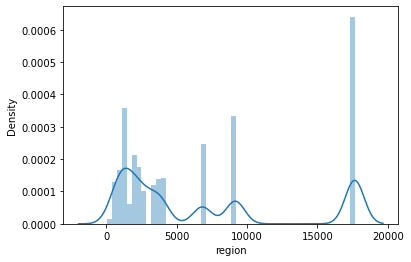

In [15]:
mapp=full_data.region.value_counts() # lets replace the region by there frequency of apearance
full_data.region=full_data.region.apply(lambda x:mapp[x])
sns.distplot(full_data.region)

<AxesSubplot:xlabel='region'>

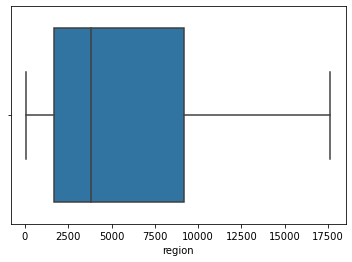

In [16]:
sns.boxplot(((full_data.region)))

# feature 4 ::education

In [17]:
full_data.education.unique()# three unique values and nan is present

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [18]:
full_data.education.value_counts([0])*100 # almost 70 percent employee are bechelors degree and only 1.5 percent are below sec

Bachelor's          69.797609
Master's & above    28.627346
Below Secondary      1.575045
Name: education, dtype: float64

In [19]:
full_data.education=full_data.education.replace({"Master's & above":2, "Bachelor's":1,  'Below Secondary':0})

In [20]:
full_data.education.unique()

array([ 2.,  1., nan,  0.])

In [21]:
full_data.education.dtypes

dtype('float64')

In [22]:
full_data.education.isnull().sum() # there are 3443 null values in education lets treat them by knn model

3443

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [24]:
ed_full_data=full_data.copy()
ed_full_data=pd.get_dummies(ed_full_data,drop_first=True)
xedtopredict=ed_full_data.loc[full_data.education.isnull(),:]
xedtrain=ed_full_data.loc[~full_data.education.isnull(),:]
xedpnew=xedtopredict.drop(['education','previous_year_rating','is_promoted'],axis=1)
xedtnew=xedtrain.drop(['previous_year_rating','is_promoted'],axis=1)
yed=xedtnew.education
xedtnew=xedtnew.drop('education',axis=1)
modeled=knn.fit(xedtnew,yed)
edpredict=modeled.predict(xedpnew)

In [25]:
full_data.loc[full_data.education.isnull(),'education']=edpredict
full_data.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# feature5 :: gender

In [26]:
full_data.gender.unique()# two categories in gender

array(['f', 'm'], dtype=object)

In [27]:
full_data.gender.value_counts([0])# 70 percent of employees are male remaining are female

m    0.70362
f    0.29638
Name: gender, dtype: float64

In [28]:
full_data.gender=full_data.gender.replace({'m':1,'f':0})

# feature 6 :: recruitment chennel

In [29]:
full_data.recruitment_channel.unique() # there are 3 type of recruitment chennel

array(['sourcing', 'other', 'referred'], dtype=object)

In [30]:
full_data.recruitment_channel.value_counts([0])*100 # 2 percent employee are recruited by reference and 42 percent by sourcing else by other

other       55.587627
sourcing    42.377839
referred     2.034535
Name: recruitment_channel, dtype: float64

# feature 7 :: no_of_trainings

In [31]:
full_data.no_of_trainings.unique()# employees has 1 to 10 numbers of trainings

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

In [32]:
full_data.no_of_trainings.value_counts([0])# 80 percent of employee gone through 1 trainings

1     0.808526
2     0.147271
3     0.032325
4     0.008404
5     0.002095
6     0.000868
7     0.000268
8     0.000089
9     0.000089
10    0.000064
Name: no_of_trainings, dtype: float64

<AxesSubplot:xlabel='no_of_trainings', ylabel='Density'>

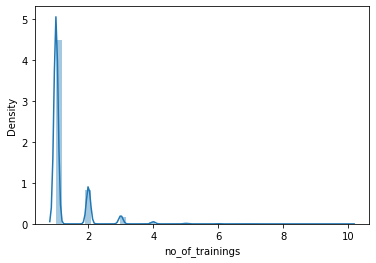

In [33]:
sns.distplot(full_data.no_of_trainings)# large number of outlier we can been this in categories

In [34]:
full_data.no_of_trainings=full_data.no_of_trainings.apply(lambda x:'one' if x==1 else 'morethan1')
full_data.no_of_trainings=full_data.no_of_trainings.replace({'one':0,'morethan1':1})

# feature 8:: Age

In [35]:
full_data.age.unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Density'>

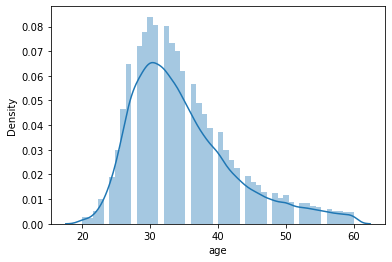

In [36]:
sns.distplot(full_data.age)# normally distributed and not muchh outliers are present

<AxesSubplot:xlabel='age', ylabel='Density'>

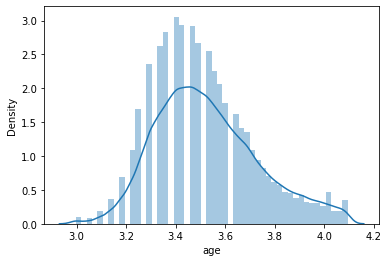

In [37]:
sns.distplot(np.log(full_data.age))

<AxesSubplot:xlabel='age'>

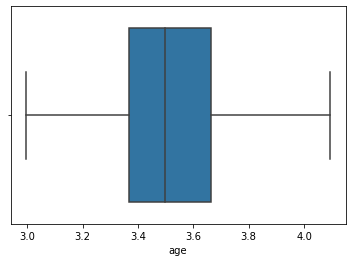

In [38]:
sns.boxplot(np.log(full_data.age))

In [39]:
full_data.age=np.log(full_data.age)

# feature 9 : previous year ratings

In [40]:
full_data.previous_year_rating.unique()# ratings are on the scale 1 to 5

array([ 5.,  3.,  1.,  4., nan,  2.])

In [41]:
full_data.previous_year_rating.value_counts([0])*100 # 36 percent of employee get 3 star of ratings only 23 percent have 5 *

3.0    36.675327
5.0    23.269119
4.0    19.521296
1.0    12.303419
2.0     8.230839
Name: previous_year_rating, dtype: float64

In [42]:
# have null values lets treat using knn

In [43]:
full_data.previous_year_rating.isnull().sum() # around 6000 of null values lets treat using knn

5936

In [44]:
knnp=KNeighborsClassifier()
ratingnulltreatment=full_data.drop('is_promoted',axis=1)
ratingnulltreatment=pd.get_dummies(ratingnulltreatment,drop_first=True)
trainrating=ratingnulltreatment.loc[~ratingnulltreatment.previous_year_rating.isnull(),]
ratingforprediction=ratingnulltreatment.loc[ratingnulltreatment.previous_year_rating.isnull(),]
xratingtr=trainrating.drop('previous_year_rating',axis=1)
yratingtr=trainrating.previous_year_rating
ratingforprediction.drop('previous_year_rating',inplace=True,axis=1)
modelrating=knnp.fit(xratingtr,yratingtr)
predictedrat=modelrating.predict(ratingforprediction)
full_data.loc[full_data.previous_year_rating.isnull(),'previous_year_rating']=predictedrat
full_data.isnull().sum()#all null values are treated

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# feature 10 ::length of service

In [45]:
full_data.length_of_service.head()

0     8
1     4
2     7
3    10
4     2
Name: length_of_service, dtype: int64

In [46]:
full_data.length_of_service.describe()# avg is around 5.8 median is also around 5 but max=37 means outlier present

count    78298.000000
mean         5.848974
std          4.248070
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

<AxesSubplot:xlabel='length_of_service'>

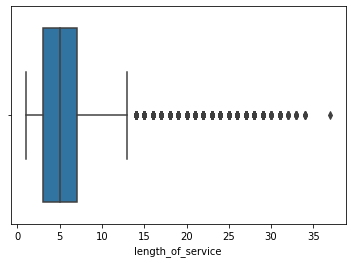

In [47]:
#lets examine the outlier and distribution
sns.boxplot(full_data.length_of_service)# outliers are present 

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

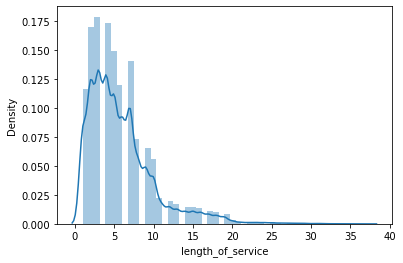

In [48]:
sns.distplot((full_data.length_of_service))

<AxesSubplot:xlabel='length_of_service'>

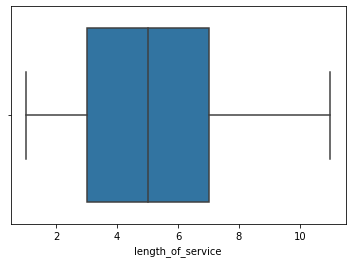

In [49]:
# lets treat outliers using caping
q5,q90=np.quantile(full_data.length_of_service,[.05,.90])
full_data.loc[full_data.length_of_service<q5,'length_of_service']=q5
full_data.loc[full_data.length_of_service>q90,'length_of_service']=q90
sns.boxplot(full_data.length_of_service)

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

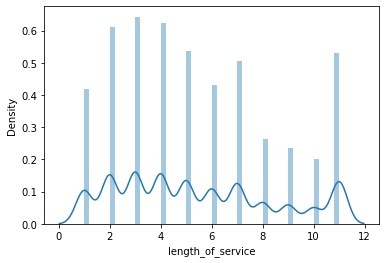

In [50]:
sns.distplot(full_data.length_of_service)# better now

# feature11 :: KPIs_met

In [51]:
full_data['KPIs_met >80%'].unique()

array([1, 0], dtype=int64)

In [52]:
full_data['KPIs_met >80%'].value_counts([0])# inly 35 percent employees met KPIs

0    0.645968
1    0.354032
Name: KPIs_met >80%, dtype: float64

# feature 12:::award_won

In [53]:
full_data['awards_won?'].unique()

array([0, 1], dtype=int64)

In [54]:
full_data['awards_won?'].value_counts([0])# only 2 percent of employees won the awards

0    0.976947
1    0.023053
Name: awards_won?, dtype: float64

# feature 13::avg training score

In [55]:
full_data.avg_training_score.head()

0    49
1    60
2    50
3    50
4    73
Name: avg_training_score, dtype: int64

In [56]:
full_data.avg_training_score.describe()# less chance of outliers

count    78298.000000
mean        63.349664
std         13.383664
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

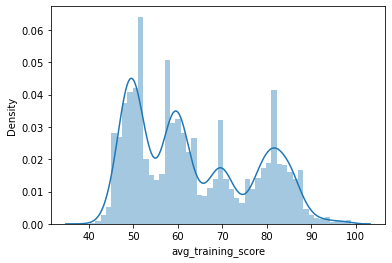

In [57]:
sns.distplot(full_data.avg_training_score)

<AxesSubplot:xlabel='avg_training_score'>

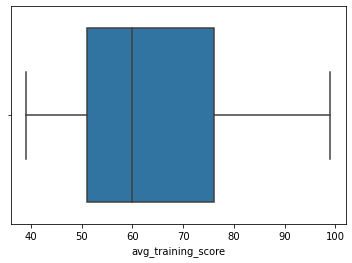

In [58]:
sns.boxplot(full_data.avg_training_score) # no outlier present

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

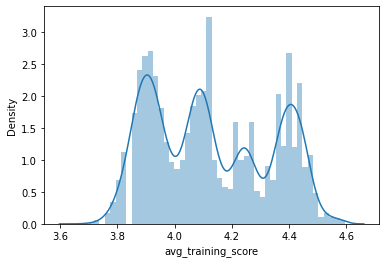

In [59]:
sns.distplot(np.log(full_data.avg_training_score))

<AxesSubplot:xlabel='avg_training_score'>

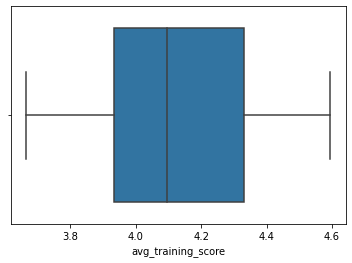

In [60]:
sns.boxplot(np.log(full_data.avg_training_score))

In [61]:
full_data.avg_training_score=np.log(full_data.avg_training_score)

# after exmine all the data let check and encode and then split data

In [62]:
full_data.dtypes

department               object
region                    int64
education               float64
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                     float64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score      float64
is_promoted             float64
dtype: object

# lets get dummies then proceed

In [63]:
full_data.shape

(78298, 13)

In [64]:
full_data.drop(['gender','recruitment_channel'],axis=1 ,inplace=True)
full_data_encoded=pd.get_dummies(full_data,drop_first=True)

# Feature Engineering

In [65]:
full_data_encoded['new feature1 ']=full_data_encoded['awards_won?']*full_data_encoded['KPIs_met >80%']
full_data_encoded['new feature2 ']=full_data_encoded.no_of_trainings*full_data_encoded.avg_training_score
full_data_encoded['new feature3 ']=full_data_encoded.region*full_data_encoded.age

# lets seprate data in original train test

In [66]:
train_processed_data=full_data_encoded.loc[~full_data_encoded.is_promoted.isnull(),]
X=train_processed_data.drop('is_promoted',axis=1)
y=train_processed_data.is_promoted

In [67]:
test_processed_data=full_data_encoded.loc[full_data_encoded.is_promoted.isnull(),]
test_processed_data=test_processed_data.drop('is_promoted',axis=1)

# lets divide train processed data in train and test for verification and scale the data

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y,random_state=4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38365, 20), (16443, 20), (38365,), (16443,))

# lets scale Data

In [69]:
sc=StandardScaler()

 *lets extract numerical variables for scaling

In [70]:
num=['region', 'education','no_of_trainings', 'age','previous_year_rating', 'length_of_service','avg_training_score']

In [71]:
sc.fit(X_train[num])

StandardScaler()

In [72]:
X_train.loc[:,num]=sc.transform(X_train[num])
X_test.loc[:,num]=sc.transform(X_test[num])
test_processed_data.loc[:,num]=sc.transform(test_processed_data[num])

# Data is ready for Modeling

In [73]:
# lets make data frame to store acuracy and f1 score
scorecard=pd.DataFrame(columns=['model name','f1scoretest','f1scoretrain','Acuracy score'])

# Model 1::Linear Logistic

In [74]:
X_train['const']=1
X_test['const']=1
model_logistic=sm.Logit(y_train,X_train).fit()
model_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.199898
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                38365
Model:                          Logit   Df Residuals:                    38344
Method:                           MLE   Df Model:                           20
Date:                Sun, 21 Aug 2022   Pseudo R-squ.:                  0.3136
Time:                        10:53:56   Log-Likelihood:                -7669.1
converged:                       True   LL-Null:                       -11174.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
region                           0.7134      0.363      1.965      0.049       0.002       1.425
education                        0.1371      0.024      5.749      0.000       0.090       0.184
no_of_trainings                 -1.1377      0.515     -2.208      0.027      -2.147      -0.128
age                             -0.1859      0.046     -4.039      0.000      -0.276      -0.096
previous_year_rating             0.2942      0.025     11.630      0.000       0.245       0.344
length_of_service                0.1226      0.029      4.292      0.000       0.067       0.179
KPIs_met >80%                    1.9742      0.054     36.532      0.000       1.868       2.080
awards_won?                      2.8129      0.172     16.394      0.000       2.477       3.149
avg_training_score               4.0143      0.082     48.936      0.000       3.854       4.175
department_Finance               6.2183      0.176     35.408      0.000       5.874       6.563
department_HR                    9.3978      0.240     39.129      0.000       8.927       9.869
department_Legal                 5.9530      0.247     24.057      0.000       5.468       6.438
department_Operations            6.3054      0.151     41.757      0.000       6.009       6.601
department_Procurement           3.5932      0.111     32.401      0.000       3.376       3.811
department_R&D                  -0.3961      0.169     -2.338      0.019      -0.728      -0.064
department_Sales & Marketing     9.8570      0.212     46.389      0.000       9.441      10.273
department_Technology            1.3935      0.084     16.665      0.000       1.230       1.557
new feature1                    -1.8285      0.206     -8.890      0.000      -2.232      -1.425
new feature2                     0.6469      0.310      2.090      0.037       0.040       1.253
new feature3                 -2.923e-05   1.61e-05     -1.816      0.069   -6.08e-05    2.32e-06
const                           -9.6569      0.499    -19.340      0.000     -10.636      -8.678
================================================================================================
"""

In [75]:
ypridicted=model_logistic.predict(X_train)
ypridictedte=model_logistic.predict(X_test)
ypridictedp5=[0 if x <0.5 else 1 for x in ypridicted]
ypridictedtest=[0 if x <0.5 else 1 for x in ypridictedte]

scorecard.loc[len(scorecard.index),:]=['logistic simple',f1_score(y_test,ypridictedtest),f1_score(y_train,ypridictedp5),accuracy_score(y_train,ypridictedp5)]

* lets check the youndens index and find threshold probability

In [76]:
def youndensthres(yact,ypridictprob):
    fpr,tpr,thres=roc_curve(yact,ypridictprob)
    table=pd.DataFrame({'FPR':fpr,'TPR':tpr,'thres':thres,'diff':np.abs(fpr-tpr)})
    thres=table.sort_values('diff',ascending=False).thres.head(1)
    prid=[0 if x<thres.values[0] else 1 for x in ypridictprob]
    return prid

In [77]:
ytrainthres=youndensthres(y_train,model_logistic.predict(X_train))
ytestthres=youndensthres(y_test,model_logistic.predict(X_test))
scorecard.loc[len(scorecard.index),:]=['logistic simple with thres',f1_score(y_test,ytestthres),f1_score(y_train,ytrainthres),accuracy_score(y_train,ytrainthres)]

* we see logistic is not performing well at any of the probability lets try some other algorithm 
 before thats lets try to drop unsignificant features and create some new features


# Decision tree

In [78]:

X_train=X_train.drop('const',axis=1)
X_test=X_test.drop('const',axis=1)

In [79]:
dct=DecisionTreeClassifier(random_state=10)
modeldecision=dct.fit(X_train,y_train)

In [80]:
scorecard.loc[len(scorecard.index),:]=['decision tree',f1_score(y_test,(modeldecision.predict(X_test))),f1_score(y_train,(modeldecision.predict(X_train))),accuracy_score(y_train,modeldecision.predict(X_train))]

# lets check same on thres probability

In [81]:
ytrthres=youndensthres(y_train,modeldecision.predict_proba(X_train)[:,1])
ytethres=youndensthres(y_test,modeldecision.predict_proba(X_test)[:,1])

In [82]:
scorecard.loc[len(scorecard.index),:]=['decision tree thres',f1_score(y_test,ytethres),f1_score(y_train,ytrthres),accuracy_score(y_train,ytrthres)]

# parameter Tunning

In [83]:
param=[{'max_depth':[5,7,10,11,14,15,16,20],'min_samples_split':[2,3,5,11,13,17]}]
est=DecisionTreeClassifier()
gse=GridSearchCV(estimator=est,param_grid=param)
gse.fit(X_train,y_train)
print(gse.best_params_)
dcttunned=DecisionTreeClassifier(**gse.best_params_)

{'max_depth': 11, 'min_samples_split': 17}


In [84]:
dcttunned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=17)

In [85]:
ytrpredicted=dct.predict(X_train)
ytepredicted=dct.predict(X_test)
scorecard.loc[len(scorecard.index),:]=['dcttunned',f1_score(y_test,ytepredicted),f1_score(y_train,ytrthres),accuracy_score(y_train,ytrpredicted)]

# Lets try Random forest

In [86]:
rfe=RandomForestClassifier()
model_rfe=rfe.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_rfe',f1_score(y_test,model_rfe.predict(X_test)),f1_score(y_train,model_rfe.predict(X_train)),accuracy_score(y_train,model_rfe.predict(X_train))]

# lets try parameter tunning

In [87]:
# not effective lets try parameter tunning
param=[{'n_estimators':[100,200,250,500],'max_depth':[5,7,10,11,14,15,16,20],'min_samples_split':[2,3,5,11,13,17]}]
gse=GridSearchCV(estimator=rfe,param_grid=param)
gse.fit(X_train,y_train)
gse.best_params_

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 250}

In [88]:
rfe=RandomForestClassifier(**gse.best_params_)
model_rfe=rfe.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_rfe tunned',f1_score(y_test,model_rfe.predict(X_test)),f1_score(y_train,model_rfe.predict(X_train)),accuracy_score(y_train,model_rfe.predict(X_train))]

# lets try boosting

# Adaboost

In [89]:
adb=AdaBoostClassifier()
modeladb=adb.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_adaboost',f1_score(y_test,modeladb.predict(X_test)),f1_score(y_train,modeladb.predict(X_train)),accuracy_score(y_train,modeladb.predict(X_train))]

# parameter tunning in adaboost

In [90]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
ada_model = AdaBoostClassifier(random_state = 10)
ada_grid = GridSearchCV(estimator = ada_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5,
                         n_jobs=-1)
ada_grid.fit(X_train, y_train)
ada_grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 350}

In [91]:
ada=AdaBoostClassifier(**ada_grid.best_params_,random_state = 10)
model_ada=ada.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_ada tunned',f1_score(y_test,model_ada.predict(X_test)),f1_score(y_train,model_ada.predict(X_train)),accuracy_score(y_train,model_ada.predict(X_train))]

# GB Boost

In [92]:
gb=GradientBoostingClassifier()
modelgb=gb.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_gbboost',f1_score(y_test,modelgb.predict(X_test)),f1_score(y_train,modelgb.predict(X_train)),accuracy_score(y_train,modelgb.predict(X_train))]

# parameter tunning in gb boost

In [93]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
gb_model  =GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gb_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5,
                         n_jobs=-1)
gb_grid.fit(X_train, y_train)
gb_grid.best_params_
 

{'learning_rate': 0.1, 'n_estimators': 250}

In [94]:
gbt=GradientBoostingClassifier(**gb_grid.best_params_)
model_gbt=gbt.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_gbboosttunned',f1_score(y_test,model_gbt.predict(X_test)),f1_score(y_train,model_gbt.predict(X_train)),accuracy_score(y_train,model_gbt.predict(X_train))]

# votting and stacking using lightgbm catboost,xgboost and adaboost

In [95]:
Classifiers = [('0.XGBoost' ,XGBClassifier()),('1.CatBoost' , CatBoostClassifier()),('2.LightGBM' , LGBMClassifier())]

In [96]:
Classifierstunned = [('0.XGBoost' , XGBClassifier(learning_rate =0.1,
                                           n_estimators=450,
                                           max_depth=5,
                                           subsample = 0.70,
                                           verbosity = 0,
                                           scale_pos_weight = 2.5)),
               ('1.CatBoost' , CatBoostClassifier(learning_rate=0.15,
                                                 n_estimators=450,
                                                 subsample=0.0185,
                                                 max_depth=5,
                                                 scale_pos_weight=2.5)),
               ('2.LightGBM' , LGBMClassifier(subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 300,
                                             learning_rate=0.15,
                                             n_estimators=450,
                                             max_depth=5,
                                             scale_pos_weight=2.5))]

# Voting classifier 

In [97]:
vm=VotingClassifier(estimators=Classifiers)
model_voting=vm.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_voting',f1_score(y_test,model_voting.predict(X_test)),f1_score(y_train,model_voting.predict(X_train)),accuracy_score(y_train,model_voting.predict(X_train))]

Learning rate set to 0.048896
0:	learn: 0.6317636	total: 194ms	remaining: 3m 13s
1:	learn: 0.5788558	total: 214ms	remaining: 1m 46s
2:	learn: 0.5350718	total: 223ms	remaining: 1m 14s
3:	learn: 0.4955944	total: 235ms	remaining: 58.4s
4:	learn: 0.4635698	total: 241ms	remaining: 48s
5:	learn: 0.4393658	total: 249ms	remaining: 41.2s
6:	learn: 0.4132843	total: 256ms	remaining: 36.3s
7:	learn: 0.3919446	total: 263ms	remaining: 32.6s
8:	learn: 0.3759183	total: 270ms	remaining: 29.8s
9:	learn: 0.3607307	total: 277ms	remaining: 27.4s
10:	learn: 0.3432919	total: 284ms	remaining: 25.5s
11:	learn: 0.3288961	total: 292ms	remaining: 24s
12:	learn: 0.3164224	total: 299ms	remaining: 22.7s
13:	learn: 0.3036231	total: 308ms	remaining: 21.7s
14:	learn: 0.2934485	total: 316ms	remaining: 20.7s
15:	learn: 0.2866391	total: 323ms	remaining: 19.9s
16:	learn: 0.2782088	total: 332ms	remaining: 19.2s
17:	learn: 0.2713180	total: 340ms	remaining: 18.6s
18:	learn: 0.2649255	total: 349ms	remaining: 18s
19:	learn: 0.2

165:	learn: 0.1629808	total: 1.7s	remaining: 8.52s
166:	learn: 0.1628683	total: 1.71s	remaining: 8.51s
167:	learn: 0.1627292	total: 1.72s	remaining: 8.5s
168:	learn: 0.1626188	total: 1.72s	remaining: 8.48s
169:	learn: 0.1624565	total: 1.73s	remaining: 8.46s
170:	learn: 0.1624193	total: 1.74s	remaining: 8.45s
171:	learn: 0.1623902	total: 1.75s	remaining: 8.43s
172:	learn: 0.1623104	total: 1.76s	remaining: 8.41s
173:	learn: 0.1622020	total: 1.77s	remaining: 8.4s
174:	learn: 0.1621470	total: 1.78s	remaining: 8.38s
175:	learn: 0.1621140	total: 1.79s	remaining: 8.37s
176:	learn: 0.1620735	total: 1.8s	remaining: 8.36s
177:	learn: 0.1619674	total: 1.81s	remaining: 8.34s
178:	learn: 0.1619139	total: 1.81s	remaining: 8.33s
179:	learn: 0.1618668	total: 1.82s	remaining: 8.31s
180:	learn: 0.1618124	total: 1.83s	remaining: 8.3s
181:	learn: 0.1617308	total: 1.84s	remaining: 8.28s
182:	learn: 0.1616710	total: 1.85s	remaining: 8.27s
183:	learn: 0.1616184	total: 1.86s	remaining: 8.26s
184:	learn: 0.161

330:	learn: 0.1531533	total: 3.2s	remaining: 6.47s
331:	learn: 0.1531178	total: 3.21s	remaining: 6.46s
332:	learn: 0.1530716	total: 3.22s	remaining: 6.45s
333:	learn: 0.1530235	total: 3.23s	remaining: 6.44s
334:	learn: 0.1529919	total: 3.24s	remaining: 6.43s
335:	learn: 0.1529291	total: 3.25s	remaining: 6.42s
336:	learn: 0.1528926	total: 3.26s	remaining: 6.41s
337:	learn: 0.1528458	total: 3.26s	remaining: 6.39s
338:	learn: 0.1528112	total: 3.27s	remaining: 6.38s
339:	learn: 0.1527399	total: 3.28s	remaining: 6.37s
340:	learn: 0.1526987	total: 3.29s	remaining: 6.36s
341:	learn: 0.1526507	total: 3.3s	remaining: 6.35s
342:	learn: 0.1526184	total: 3.31s	remaining: 6.34s
343:	learn: 0.1525677	total: 3.32s	remaining: 6.33s
344:	learn: 0.1524993	total: 3.33s	remaining: 6.32s
345:	learn: 0.1524624	total: 3.34s	remaining: 6.31s
346:	learn: 0.1524318	total: 3.35s	remaining: 6.3s
347:	learn: 0.1523748	total: 3.36s	remaining: 6.29s
348:	learn: 0.1523505	total: 3.37s	remaining: 6.28s
349:	learn: 0.1

494:	learn: 0.1472742	total: 4.71s	remaining: 4.81s
495:	learn: 0.1472215	total: 4.72s	remaining: 4.8s
496:	learn: 0.1471708	total: 4.73s	remaining: 4.79s
497:	learn: 0.1471462	total: 4.74s	remaining: 4.78s
498:	learn: 0.1470980	total: 4.75s	remaining: 4.77s
499:	learn: 0.1470706	total: 4.76s	remaining: 4.76s
500:	learn: 0.1470592	total: 4.77s	remaining: 4.75s
501:	learn: 0.1470341	total: 4.78s	remaining: 4.74s
502:	learn: 0.1469942	total: 4.79s	remaining: 4.73s
503:	learn: 0.1469730	total: 4.8s	remaining: 4.72s
504:	learn: 0.1469411	total: 4.81s	remaining: 4.71s
505:	learn: 0.1469030	total: 4.82s	remaining: 4.7s
506:	learn: 0.1468766	total: 4.83s	remaining: 4.69s
507:	learn: 0.1468324	total: 4.83s	remaining: 4.68s
508:	learn: 0.1468296	total: 4.84s	remaining: 4.67s
509:	learn: 0.1467739	total: 4.85s	remaining: 4.66s
510:	learn: 0.1467385	total: 4.86s	remaining: 4.65s
511:	learn: 0.1466659	total: 4.87s	remaining: 4.64s
512:	learn: 0.1466299	total: 4.88s	remaining: 4.63s
513:	learn: 0.1

658:	learn: 0.1421257	total: 6.22s	remaining: 3.22s
659:	learn: 0.1420958	total: 6.23s	remaining: 3.21s
660:	learn: 0.1420769	total: 6.24s	remaining: 3.2s
661:	learn: 0.1420456	total: 6.25s	remaining: 3.19s
662:	learn: 0.1420243	total: 6.26s	remaining: 3.18s
663:	learn: 0.1420052	total: 6.27s	remaining: 3.17s
664:	learn: 0.1419807	total: 6.28s	remaining: 3.16s
665:	learn: 0.1419717	total: 6.29s	remaining: 3.15s
666:	learn: 0.1419034	total: 6.3s	remaining: 3.14s
667:	learn: 0.1418722	total: 6.31s	remaining: 3.13s
668:	learn: 0.1418141	total: 6.32s	remaining: 3.13s
669:	learn: 0.1417621	total: 6.33s	remaining: 3.12s
670:	learn: 0.1417337	total: 6.33s	remaining: 3.11s
671:	learn: 0.1416981	total: 6.34s	remaining: 3.1s
672:	learn: 0.1416647	total: 6.35s	remaining: 3.09s
673:	learn: 0.1416350	total: 6.36s	remaining: 3.08s
674:	learn: 0.1416113	total: 6.37s	remaining: 3.07s
675:	learn: 0.1415966	total: 6.38s	remaining: 3.06s
676:	learn: 0.1415563	total: 6.39s	remaining: 3.05s
677:	learn: 0.1

826:	learn: 0.1376696	total: 7.78s	remaining: 1.63s
827:	learn: 0.1376526	total: 7.79s	remaining: 1.62s
828:	learn: 0.1376352	total: 7.8s	remaining: 1.61s
829:	learn: 0.1375902	total: 7.81s	remaining: 1.6s
830:	learn: 0.1375620	total: 7.82s	remaining: 1.59s
831:	learn: 0.1375471	total: 7.82s	remaining: 1.58s
832:	learn: 0.1375174	total: 7.83s	remaining: 1.57s
833:	learn: 0.1375014	total: 7.84s	remaining: 1.56s
834:	learn: 0.1374954	total: 7.85s	remaining: 1.55s
835:	learn: 0.1374602	total: 7.86s	remaining: 1.54s
836:	learn: 0.1374155	total: 7.87s	remaining: 1.53s
837:	learn: 0.1373779	total: 7.88s	remaining: 1.52s
838:	learn: 0.1373737	total: 7.89s	remaining: 1.51s
839:	learn: 0.1373478	total: 7.9s	remaining: 1.5s
840:	learn: 0.1373228	total: 7.91s	remaining: 1.49s
841:	learn: 0.1372954	total: 7.92s	remaining: 1.49s
842:	learn: 0.1372850	total: 7.92s	remaining: 1.48s
843:	learn: 0.1372774	total: 7.93s	remaining: 1.47s
844:	learn: 0.1372264	total: 7.94s	remaining: 1.46s
845:	learn: 0.13

989:	learn: 0.1336631	total: 9.28s	remaining: 93.7ms
990:	learn: 0.1336561	total: 9.29s	remaining: 84.4ms
991:	learn: 0.1336337	total: 9.3s	remaining: 75ms
992:	learn: 0.1336101	total: 9.31s	remaining: 65.6ms
993:	learn: 0.1335987	total: 9.31s	remaining: 56.2ms
994:	learn: 0.1335741	total: 9.32s	remaining: 46.9ms
995:	learn: 0.1335296	total: 9.33s	remaining: 37.5ms
996:	learn: 0.1335087	total: 9.34s	remaining: 28.1ms
997:	learn: 0.1334955	total: 9.35s	remaining: 18.7ms
998:	learn: 0.1334695	total: 9.36s	remaining: 9.37ms
999:	learn: 0.1334444	total: 9.37s	remaining: 0us


# voting classifier tunned

In [104]:
vmtunned=VotingClassifier(estimators=Classifierstunned)
model_votingtunned=vmtunned.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_votingtunned',f1_score(y_test,model_votingtunned.predict(X_test)),f1_score(y_train,model_votingtunned.predict(X_train)),accuracy_score(y_train,model_votingtunned.predict(X_train))]


0:	learn: 0.5705245	total: 14.2ms	remaining: 6.39s
1:	learn: 0.4832235	total: 21.4ms	remaining: 4.8s
2:	learn: 0.4253630	total: 29ms	remaining: 4.32s
3:	learn: 0.3969183	total: 37.3ms	remaining: 4.16s
4:	learn: 0.3782803	total: 44.7ms	remaining: 3.98s
5:	learn: 0.3593706	total: 51.2ms	remaining: 3.79s
6:	learn: 0.3526750	total: 57ms	remaining: 3.6s
7:	learn: 0.3473399	total: 64ms	remaining: 3.53s
8:	learn: 0.3429229	total: 69.7ms	remaining: 3.42s
9:	learn: 0.3395316	total: 77.4ms	remaining: 3.4s
10:	learn: 0.3325594	total: 83.7ms	remaining: 3.34s
11:	learn: 0.3304269	total: 90.8ms	remaining: 3.31s
12:	learn: 0.3200696	total: 97.2ms	remaining: 3.27s
13:	learn: 0.3168646	total: 103ms	remaining: 3.21s
14:	learn: 0.3163778	total: 110ms	remaining: 3.2s
15:	learn: 0.3153857	total: 116ms	remaining: 3.16s
16:	learn: 0.3134867	total: 124ms	remaining: 3.15s
17:	learn: 0.3126581	total: 129ms	remaining: 3.11s
18:	learn: 0.3118424	total: 135ms	remaining: 3.06s
19:	learn: 0.3104798	total: 142ms	rema

170:	learn: 0.2597906	total: 1.11s	remaining: 1.8s
171:	learn: 0.2587185	total: 1.11s	remaining: 1.8s
172:	learn: 0.2586810	total: 1.12s	remaining: 1.79s
173:	learn: 0.2585788	total: 1.13s	remaining: 1.79s
174:	learn: 0.2585097	total: 1.14s	remaining: 1.78s
175:	learn: 0.2583836	total: 1.14s	remaining: 1.78s
176:	learn: 0.2582287	total: 1.15s	remaining: 1.78s
177:	learn: 0.2581212	total: 1.16s	remaining: 1.77s
178:	learn: 0.2580791	total: 1.17s	remaining: 1.77s
179:	learn: 0.2579975	total: 1.17s	remaining: 1.76s
180:	learn: 0.2578887	total: 1.18s	remaining: 1.76s
181:	learn: 0.2577814	total: 1.19s	remaining: 1.75s
182:	learn: 0.2576958	total: 1.2s	remaining: 1.75s
183:	learn: 0.2576233	total: 1.2s	remaining: 1.74s
184:	learn: 0.2575548	total: 1.21s	remaining: 1.73s
185:	learn: 0.2574698	total: 1.22s	remaining: 1.73s
186:	learn: 0.2573481	total: 1.22s	remaining: 1.72s
187:	learn: 0.2559011	total: 1.23s	remaining: 1.72s
188:	learn: 0.2558822	total: 1.24s	remaining: 1.71s
189:	learn: 0.25

345:	learn: 0.2419792	total: 2.19s	remaining: 659ms
346:	learn: 0.2419639	total: 2.2s	remaining: 653ms
347:	learn: 0.2418513	total: 2.21s	remaining: 646ms
348:	learn: 0.2418079	total: 2.21s	remaining: 640ms
349:	learn: 0.2417362	total: 2.22s	remaining: 633ms
350:	learn: 0.2416770	total: 2.22s	remaining: 627ms
351:	learn: 0.2416155	total: 2.23s	remaining: 621ms
352:	learn: 0.2415690	total: 2.23s	remaining: 614ms
353:	learn: 0.2415189	total: 2.24s	remaining: 608ms
354:	learn: 0.2414926	total: 2.25s	remaining: 601ms
355:	learn: 0.2414353	total: 2.25s	remaining: 595ms
356:	learn: 0.2414136	total: 2.26s	remaining: 588ms
357:	learn: 0.2413859	total: 2.26s	remaining: 582ms
358:	learn: 0.2413419	total: 2.27s	remaining: 575ms
359:	learn: 0.2413112	total: 2.27s	remaining: 569ms
360:	learn: 0.2412570	total: 2.28s	remaining: 562ms
361:	learn: 0.2411854	total: 2.29s	remaining: 556ms
362:	learn: 0.2411094	total: 2.29s	remaining: 549ms
363:	learn: 0.2410725	total: 2.3s	remaining: 543ms
364:	learn: 0.

# Stacking Classifier

In [105]:
st=StackingClassifier(estimators=Classifiers)
modelst=st.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_stackeing',f1_score(y_test,modelst.predict(X_test)),f1_score(y_train,modelst.predict(X_train)),accuracy_score(y_train,modelst.predict(X_train))]

Learning rate set to 0.048896
0:	learn: 0.6317636	total: 12.1ms	remaining: 12.1s
1:	learn: 0.5788558	total: 23.2ms	remaining: 11.6s
2:	learn: 0.5350718	total: 31.6ms	remaining: 10.5s
3:	learn: 0.4955944	total: 42.9ms	remaining: 10.7s
4:	learn: 0.4635698	total: 49.6ms	remaining: 9.86s
5:	learn: 0.4393658	total: 59.8ms	remaining: 9.91s
6:	learn: 0.4132843	total: 69.8ms	remaining: 9.9s
7:	learn: 0.3919446	total: 78.9ms	remaining: 9.79s
8:	learn: 0.3759183	total: 90.6ms	remaining: 9.97s
9:	learn: 0.3607307	total: 101ms	remaining: 9.95s
10:	learn: 0.3432919	total: 110ms	remaining: 9.91s
11:	learn: 0.3288961	total: 122ms	remaining: 10s
12:	learn: 0.3164224	total: 131ms	remaining: 9.92s
13:	learn: 0.3036231	total: 141ms	remaining: 9.93s
14:	learn: 0.2934485	total: 151ms	remaining: 9.9s
15:	learn: 0.2866391	total: 159ms	remaining: 9.8s
16:	learn: 0.2782088	total: 171ms	remaining: 9.86s
17:	learn: 0.2713180	total: 179ms	remaining: 9.77s
18:	learn: 0.2649255	total: 191ms	remaining: 9.86s
19:	lea

164:	learn: 0.1630515	total: 1.32s	remaining: 6.67s
165:	learn: 0.1629808	total: 1.33s	remaining: 6.67s
166:	learn: 0.1628683	total: 1.34s	remaining: 6.66s
167:	learn: 0.1627292	total: 1.34s	remaining: 6.66s
168:	learn: 0.1626188	total: 1.35s	remaining: 6.64s
169:	learn: 0.1624565	total: 1.36s	remaining: 6.63s
170:	learn: 0.1624193	total: 1.36s	remaining: 6.62s
171:	learn: 0.1623902	total: 1.37s	remaining: 6.61s
172:	learn: 0.1623104	total: 1.38s	remaining: 6.6s
173:	learn: 0.1622020	total: 1.39s	remaining: 6.59s
174:	learn: 0.1621470	total: 1.4s	remaining: 6.58s
175:	learn: 0.1621140	total: 1.4s	remaining: 6.57s
176:	learn: 0.1620735	total: 1.41s	remaining: 6.55s
177:	learn: 0.1619674	total: 1.42s	remaining: 6.55s
178:	learn: 0.1619139	total: 1.43s	remaining: 6.54s
179:	learn: 0.1618668	total: 1.43s	remaining: 6.53s
180:	learn: 0.1618124	total: 1.44s	remaining: 6.52s
181:	learn: 0.1617308	total: 1.45s	remaining: 6.5s
182:	learn: 0.1616710	total: 1.45s	remaining: 6.5s
183:	learn: 0.161

338:	learn: 0.1528112	total: 2.64s	remaining: 5.16s
339:	learn: 0.1527399	total: 2.65s	remaining: 5.15s
340:	learn: 0.1526987	total: 2.66s	remaining: 5.14s
341:	learn: 0.1526507	total: 2.67s	remaining: 5.14s
342:	learn: 0.1526184	total: 2.68s	remaining: 5.13s
343:	learn: 0.1525677	total: 2.68s	remaining: 5.12s
344:	learn: 0.1524993	total: 2.69s	remaining: 5.11s
345:	learn: 0.1524624	total: 2.7s	remaining: 5.1s
346:	learn: 0.1524318	total: 2.71s	remaining: 5.09s
347:	learn: 0.1523748	total: 2.71s	remaining: 5.08s
348:	learn: 0.1523505	total: 2.72s	remaining: 5.07s
349:	learn: 0.1523084	total: 2.73s	remaining: 5.07s
350:	learn: 0.1522941	total: 2.73s	remaining: 5.06s
351:	learn: 0.1522498	total: 2.74s	remaining: 5.05s
352:	learn: 0.1522390	total: 2.75s	remaining: 5.04s
353:	learn: 0.1522014	total: 2.76s	remaining: 5.03s
354:	learn: 0.1521707	total: 2.76s	remaining: 5.02s
355:	learn: 0.1521455	total: 2.77s	remaining: 5.01s
356:	learn: 0.1521271	total: 2.78s	remaining: 5s
357:	learn: 0.152

514:	learn: 0.1465469	total: 4s	remaining: 3.76s
515:	learn: 0.1465263	total: 4s	remaining: 3.76s
516:	learn: 0.1464883	total: 4.01s	remaining: 3.75s
517:	learn: 0.1464490	total: 4.02s	remaining: 3.74s
518:	learn: 0.1464105	total: 4.03s	remaining: 3.74s
519:	learn: 0.1463915	total: 4.04s	remaining: 3.73s
520:	learn: 0.1463800	total: 4.05s	remaining: 3.72s
521:	learn: 0.1463347	total: 4.06s	remaining: 3.72s
522:	learn: 0.1463046	total: 4.07s	remaining: 3.72s
523:	learn: 0.1462851	total: 4.08s	remaining: 3.71s
524:	learn: 0.1462587	total: 4.09s	remaining: 3.71s
525:	learn: 0.1462171	total: 4.11s	remaining: 3.7s
526:	learn: 0.1461819	total: 4.12s	remaining: 3.69s
527:	learn: 0.1461723	total: 4.13s	remaining: 3.69s
528:	learn: 0.1461366	total: 4.14s	remaining: 3.69s
529:	learn: 0.1461268	total: 4.15s	remaining: 3.68s
530:	learn: 0.1460979	total: 4.16s	remaining: 3.67s
531:	learn: 0.1460712	total: 4.16s	remaining: 3.66s
532:	learn: 0.1460312	total: 4.17s	remaining: 3.66s
533:	learn: 0.14600

674:	learn: 0.1416113	total: 5.25s	remaining: 2.53s
675:	learn: 0.1415966	total: 5.25s	remaining: 2.52s
676:	learn: 0.1415563	total: 5.26s	remaining: 2.51s
677:	learn: 0.1415302	total: 5.27s	remaining: 2.5s
678:	learn: 0.1414964	total: 5.28s	remaining: 2.5s
679:	learn: 0.1414567	total: 5.29s	remaining: 2.49s
680:	learn: 0.1414264	total: 5.29s	remaining: 2.48s
681:	learn: 0.1413927	total: 5.3s	remaining: 2.47s
682:	learn: 0.1413528	total: 5.31s	remaining: 2.46s
683:	learn: 0.1413276	total: 5.32s	remaining: 2.46s
684:	learn: 0.1412965	total: 5.32s	remaining: 2.45s
685:	learn: 0.1412866	total: 5.33s	remaining: 2.44s
686:	learn: 0.1412526	total: 5.34s	remaining: 2.43s
687:	learn: 0.1412251	total: 5.34s	remaining: 2.42s
688:	learn: 0.1411907	total: 5.35s	remaining: 2.42s
689:	learn: 0.1411700	total: 5.36s	remaining: 2.41s
690:	learn: 0.1411236	total: 5.37s	remaining: 2.4s
691:	learn: 0.1410992	total: 5.37s	remaining: 2.39s
692:	learn: 0.1410884	total: 5.38s	remaining: 2.38s
693:	learn: 0.14

837:	learn: 0.1373779	total: 6.49s	remaining: 1.25s
838:	learn: 0.1373737	total: 6.5s	remaining: 1.25s
839:	learn: 0.1373478	total: 6.51s	remaining: 1.24s
840:	learn: 0.1373228	total: 6.52s	remaining: 1.23s
841:	learn: 0.1372954	total: 6.52s	remaining: 1.22s
842:	learn: 0.1372850	total: 6.53s	remaining: 1.22s
843:	learn: 0.1372774	total: 6.54s	remaining: 1.21s
844:	learn: 0.1372264	total: 6.55s	remaining: 1.2s
845:	learn: 0.1371942	total: 6.55s	remaining: 1.19s
846:	learn: 0.1371718	total: 6.56s	remaining: 1.19s
847:	learn: 0.1371372	total: 6.57s	remaining: 1.18s
848:	learn: 0.1371216	total: 6.58s	remaining: 1.17s
849:	learn: 0.1371062	total: 6.58s	remaining: 1.16s
850:	learn: 0.1370846	total: 6.59s	remaining: 1.15s
851:	learn: 0.1370589	total: 6.6s	remaining: 1.15s
852:	learn: 0.1370226	total: 6.61s	remaining: 1.14s
853:	learn: 0.1369863	total: 6.61s	remaining: 1.13s
854:	learn: 0.1369409	total: 6.62s	remaining: 1.12s
855:	learn: 0.1369072	total: 6.63s	remaining: 1.11s
856:	learn: 0.1

Learning rate set to 0.044452
0:	learn: 0.6460325	total: 9.23ms	remaining: 9.22s
1:	learn: 0.5953323	total: 18.2ms	remaining: 9.07s
2:	learn: 0.5527995	total: 27.2ms	remaining: 9.04s
3:	learn: 0.5191095	total: 36ms	remaining: 8.98s
4:	learn: 0.4849154	total: 44.7ms	remaining: 8.9s
5:	learn: 0.4573929	total: 53.1ms	remaining: 8.79s
6:	learn: 0.4353648	total: 60.4ms	remaining: 8.57s
7:	learn: 0.4165461	total: 67.7ms	remaining: 8.4s
8:	learn: 0.3967309	total: 74.9ms	remaining: 8.24s
9:	learn: 0.3779189	total: 82.2ms	remaining: 8.14s
10:	learn: 0.3617583	total: 90ms	remaining: 8.09s
11:	learn: 0.3473101	total: 96.8ms	remaining: 7.97s
12:	learn: 0.3372429	total: 104ms	remaining: 7.91s
13:	learn: 0.3237341	total: 112ms	remaining: 7.86s
14:	learn: 0.3136974	total: 119ms	remaining: 7.84s
15:	learn: 0.3046272	total: 127ms	remaining: 7.82s
16:	learn: 0.2978797	total: 135ms	remaining: 7.82s
17:	learn: 0.2900496	total: 143ms	remaining: 7.82s
18:	learn: 0.2841552	total: 151ms	remaining: 7.82s
19:	l

171:	learn: 0.1631834	total: 1.48s	remaining: 7.14s
172:	learn: 0.1631126	total: 1.49s	remaining: 7.14s
173:	learn: 0.1630528	total: 1.5s	remaining: 7.13s
174:	learn: 0.1629976	total: 1.51s	remaining: 7.12s
175:	learn: 0.1629569	total: 1.53s	remaining: 7.18s
176:	learn: 0.1628535	total: 1.55s	remaining: 7.19s
177:	learn: 0.1628241	total: 1.56s	remaining: 7.19s
178:	learn: 0.1627915	total: 1.56s	remaining: 7.18s
179:	learn: 0.1625606	total: 1.57s	remaining: 7.17s
180:	learn: 0.1625118	total: 1.58s	remaining: 7.16s
181:	learn: 0.1624059	total: 1.59s	remaining: 7.16s
182:	learn: 0.1622951	total: 1.6s	remaining: 7.15s
183:	learn: 0.1621812	total: 1.61s	remaining: 7.14s
184:	learn: 0.1621022	total: 1.62s	remaining: 7.14s
185:	learn: 0.1619637	total: 1.63s	remaining: 7.13s
186:	learn: 0.1619241	total: 1.64s	remaining: 7.12s
187:	learn: 0.1618819	total: 1.65s	remaining: 7.11s
188:	learn: 0.1617719	total: 1.66s	remaining: 7.1s
189:	learn: 0.1617021	total: 1.67s	remaining: 7.1s
190:	learn: 0.16

338:	learn: 0.1527399	total: 2.97s	remaining: 5.79s
339:	learn: 0.1527100	total: 2.98s	remaining: 5.78s
340:	learn: 0.1526463	total: 2.98s	remaining: 5.77s
341:	learn: 0.1526172	total: 2.99s	remaining: 5.76s
342:	learn: 0.1525869	total: 3s	remaining: 5.75s
343:	learn: 0.1525722	total: 3.01s	remaining: 5.74s
344:	learn: 0.1525100	total: 3.02s	remaining: 5.73s
345:	learn: 0.1524858	total: 3.03s	remaining: 5.72s
346:	learn: 0.1524384	total: 3.04s	remaining: 5.71s
347:	learn: 0.1524226	total: 3.04s	remaining: 5.7s
348:	learn: 0.1523686	total: 3.05s	remaining: 5.7s
349:	learn: 0.1523257	total: 3.06s	remaining: 5.68s
350:	learn: 0.1523004	total: 3.07s	remaining: 5.68s
351:	learn: 0.1522744	total: 3.08s	remaining: 5.67s
352:	learn: 0.1522623	total: 3.09s	remaining: 5.66s
353:	learn: 0.1522281	total: 3.1s	remaining: 5.65s
354:	learn: 0.1521580	total: 3.1s	remaining: 5.64s
355:	learn: 0.1521029	total: 3.11s	remaining: 5.63s
356:	learn: 0.1520759	total: 3.12s	remaining: 5.62s
357:	learn: 0.15205

507:	learn: 0.1457121	total: 4.45s	remaining: 4.31s
508:	learn: 0.1456834	total: 4.46s	remaining: 4.3s
509:	learn: 0.1456321	total: 4.47s	remaining: 4.3s
510:	learn: 0.1456137	total: 4.48s	remaining: 4.29s
511:	learn: 0.1456053	total: 4.49s	remaining: 4.28s
512:	learn: 0.1455591	total: 4.5s	remaining: 4.27s
513:	learn: 0.1455170	total: 4.51s	remaining: 4.26s
514:	learn: 0.1454864	total: 4.52s	remaining: 4.25s
515:	learn: 0.1454609	total: 4.53s	remaining: 4.24s
516:	learn: 0.1454129	total: 4.53s	remaining: 4.24s
517:	learn: 0.1453913	total: 4.54s	remaining: 4.23s
518:	learn: 0.1453701	total: 4.55s	remaining: 4.22s
519:	learn: 0.1453519	total: 4.56s	remaining: 4.21s
520:	learn: 0.1453242	total: 4.57s	remaining: 4.2s
521:	learn: 0.1453029	total: 4.58s	remaining: 4.19s
522:	learn: 0.1452692	total: 4.58s	remaining: 4.18s
523:	learn: 0.1452302	total: 4.59s	remaining: 4.17s
524:	learn: 0.1451897	total: 4.6s	remaining: 4.16s
525:	learn: 0.1451651	total: 4.61s	remaining: 4.16s
526:	learn: 0.145

674:	learn: 0.1398532	total: 5.95s	remaining: 2.86s
675:	learn: 0.1398248	total: 5.96s	remaining: 2.85s
676:	learn: 0.1397904	total: 5.96s	remaining: 2.85s
677:	learn: 0.1397624	total: 5.97s	remaining: 2.84s
678:	learn: 0.1397196	total: 5.98s	remaining: 2.83s
679:	learn: 0.1396810	total: 5.99s	remaining: 2.82s
680:	learn: 0.1396467	total: 6s	remaining: 2.81s
681:	learn: 0.1396141	total: 6.01s	remaining: 2.8s
682:	learn: 0.1395738	total: 6.02s	remaining: 2.79s
683:	learn: 0.1395350	total: 6.03s	remaining: 2.79s
684:	learn: 0.1395161	total: 6.04s	remaining: 2.77s
685:	learn: 0.1394934	total: 6.04s	remaining: 2.77s
686:	learn: 0.1394646	total: 6.05s	remaining: 2.76s
687:	learn: 0.1394216	total: 6.06s	remaining: 2.75s
688:	learn: 0.1393827	total: 6.07s	remaining: 2.74s
689:	learn: 0.1393374	total: 6.08s	remaining: 2.73s
690:	learn: 0.1392934	total: 6.09s	remaining: 2.72s
691:	learn: 0.1392464	total: 6.1s	remaining: 2.71s
692:	learn: 0.1392151	total: 6.11s	remaining: 2.71s
693:	learn: 0.139

841:	learn: 0.1346604	total: 7.44s	remaining: 1.4s
842:	learn: 0.1346336	total: 7.45s	remaining: 1.39s
843:	learn: 0.1346241	total: 7.46s	remaining: 1.38s
844:	learn: 0.1346107	total: 7.46s	remaining: 1.37s
845:	learn: 0.1345818	total: 7.48s	remaining: 1.36s
846:	learn: 0.1345361	total: 7.49s	remaining: 1.35s
847:	learn: 0.1345038	total: 7.5s	remaining: 1.34s
848:	learn: 0.1344804	total: 7.5s	remaining: 1.33s
849:	learn: 0.1344376	total: 7.51s	remaining: 1.32s
850:	learn: 0.1344138	total: 7.52s	remaining: 1.32s
851:	learn: 0.1343969	total: 7.53s	remaining: 1.31s
852:	learn: 0.1343674	total: 7.54s	remaining: 1.3s
853:	learn: 0.1343400	total: 7.55s	remaining: 1.29s
854:	learn: 0.1342972	total: 7.56s	remaining: 1.28s
855:	learn: 0.1342727	total: 7.57s	remaining: 1.27s
856:	learn: 0.1342541	total: 7.57s	remaining: 1.26s
857:	learn: 0.1342052	total: 7.58s	remaining: 1.25s
858:	learn: 0.1341887	total: 7.59s	remaining: 1.25s
859:	learn: 0.1341696	total: 7.6s	remaining: 1.24s
860:	learn: 0.134

Learning rate set to 0.044452
0:	learn: 0.6365877	total: 11ms	remaining: 11s
1:	learn: 0.5875181	total: 21.7ms	remaining: 10.8s
2:	learn: 0.5461379	total: 30.4ms	remaining: 10.1s
3:	learn: 0.5118102	total: 40.9ms	remaining: 10.2s
4:	learn: 0.4759004	total: 47.5ms	remaining: 9.46s
5:	learn: 0.4503722	total: 56.7ms	remaining: 9.39s
6:	learn: 0.4284964	total: 63.4ms	remaining: 8.99s
7:	learn: 0.4099856	total: 69.5ms	remaining: 8.62s
8:	learn: 0.3905932	total: 75.9ms	remaining: 8.36s
9:	learn: 0.3722222	total: 82.5ms	remaining: 8.16s
10:	learn: 0.3565742	total: 89.2ms	remaining: 8.02s
11:	learn: 0.3435691	total: 96.5ms	remaining: 7.94s
12:	learn: 0.3336101	total: 103ms	remaining: 7.84s
13:	learn: 0.3211935	total: 110ms	remaining: 7.78s
14:	learn: 0.3129992	total: 117ms	remaining: 7.7s
15:	learn: 0.3039962	total: 124ms	remaining: 7.65s
16:	learn: 0.2963732	total: 132ms	remaining: 7.61s
17:	learn: 0.2887986	total: 139ms	remaining: 7.58s
18:	learn: 0.2830719	total: 146ms	remaining: 7.54s
19:	

168:	learn: 0.1644736	total: 1.31s	remaining: 6.46s
169:	learn: 0.1643332	total: 1.32s	remaining: 6.46s
170:	learn: 0.1642971	total: 1.33s	remaining: 6.45s
171:	learn: 0.1642136	total: 1.34s	remaining: 6.45s
172:	learn: 0.1641071	total: 1.35s	remaining: 6.45s
173:	learn: 0.1640094	total: 1.36s	remaining: 6.44s
174:	learn: 0.1639639	total: 1.36s	remaining: 6.43s
175:	learn: 0.1639245	total: 1.37s	remaining: 6.42s
176:	learn: 0.1637843	total: 1.38s	remaining: 6.41s
177:	learn: 0.1636869	total: 1.39s	remaining: 6.41s
178:	learn: 0.1636518	total: 1.4s	remaining: 6.4s
179:	learn: 0.1635757	total: 1.4s	remaining: 6.39s
180:	learn: 0.1634911	total: 1.41s	remaining: 6.39s
181:	learn: 0.1633880	total: 1.42s	remaining: 6.38s
182:	learn: 0.1632538	total: 1.43s	remaining: 6.37s
183:	learn: 0.1632031	total: 1.43s	remaining: 6.36s
184:	learn: 0.1631303	total: 1.44s	remaining: 6.35s
185:	learn: 0.1630965	total: 1.45s	remaining: 6.34s
186:	learn: 0.1630273	total: 1.46s	remaining: 6.33s
187:	learn: 0.1

335:	learn: 0.1532934	total: 2.64s	remaining: 5.21s
336:	learn: 0.1532527	total: 2.65s	remaining: 5.2s
337:	learn: 0.1531730	total: 2.65s	remaining: 5.2s
338:	learn: 0.1531195	total: 2.66s	remaining: 5.19s
339:	learn: 0.1530215	total: 2.67s	remaining: 5.19s
340:	learn: 0.1529632	total: 2.68s	remaining: 5.19s
341:	learn: 0.1528841	total: 2.69s	remaining: 5.18s
342:	learn: 0.1528697	total: 2.7s	remaining: 5.18s
343:	learn: 0.1528360	total: 2.71s	remaining: 5.17s
344:	learn: 0.1527960	total: 2.72s	remaining: 5.17s
345:	learn: 0.1527505	total: 2.73s	remaining: 5.16s
346:	learn: 0.1527111	total: 2.74s	remaining: 5.16s
347:	learn: 0.1526629	total: 2.75s	remaining: 5.15s
348:	learn: 0.1525636	total: 2.76s	remaining: 5.15s
349:	learn: 0.1525308	total: 2.77s	remaining: 5.14s
350:	learn: 0.1525089	total: 2.78s	remaining: 5.13s
351:	learn: 0.1524314	total: 2.79s	remaining: 5.13s
352:	learn: 0.1524018	total: 2.8s	remaining: 5.13s
353:	learn: 0.1523901	total: 2.81s	remaining: 5.12s
354:	learn: 0.15

498:	learn: 0.1464642	total: 3.96s	remaining: 3.98s
499:	learn: 0.1464468	total: 3.97s	remaining: 3.97s
500:	learn: 0.1464051	total: 3.98s	remaining: 3.96s
501:	learn: 0.1463604	total: 3.98s	remaining: 3.95s
502:	learn: 0.1463134	total: 3.99s	remaining: 3.94s
503:	learn: 0.1462651	total: 4s	remaining: 3.94s
504:	learn: 0.1462501	total: 4.01s	remaining: 3.93s
505:	learn: 0.1462143	total: 4.02s	remaining: 3.92s
506:	learn: 0.1461854	total: 4.02s	remaining: 3.91s
507:	learn: 0.1461459	total: 4.03s	remaining: 3.9s
508:	learn: 0.1461234	total: 4.04s	remaining: 3.9s
509:	learn: 0.1460883	total: 4.04s	remaining: 3.89s
510:	learn: 0.1460652	total: 4.05s	remaining: 3.88s
511:	learn: 0.1460397	total: 4.06s	remaining: 3.87s
512:	learn: 0.1459922	total: 4.07s	remaining: 3.86s
513:	learn: 0.1459675	total: 4.08s	remaining: 3.85s
514:	learn: 0.1459334	total: 4.08s	remaining: 3.85s
515:	learn: 0.1459048	total: 4.09s	remaining: 3.84s
516:	learn: 0.1458661	total: 4.1s	remaining: 3.83s
517:	learn: 0.1458

672:	learn: 0.1409329	total: 5.31s	remaining: 2.58s
673:	learn: 0.1409075	total: 5.32s	remaining: 2.57s
674:	learn: 0.1408632	total: 5.32s	remaining: 2.56s
675:	learn: 0.1408197	total: 5.33s	remaining: 2.56s
676:	learn: 0.1407986	total: 5.34s	remaining: 2.55s
677:	learn: 0.1407798	total: 5.35s	remaining: 2.54s
678:	learn: 0.1407478	total: 5.36s	remaining: 2.53s
679:	learn: 0.1407371	total: 5.36s	remaining: 2.52s
680:	learn: 0.1407001	total: 5.37s	remaining: 2.52s
681:	learn: 0.1406648	total: 5.38s	remaining: 2.51s
682:	learn: 0.1406326	total: 5.38s	remaining: 2.5s
683:	learn: 0.1406007	total: 5.39s	remaining: 2.49s
684:	learn: 0.1405770	total: 5.4s	remaining: 2.48s
685:	learn: 0.1405640	total: 5.41s	remaining: 2.47s
686:	learn: 0.1405430	total: 5.41s	remaining: 2.47s
687:	learn: 0.1405134	total: 5.42s	remaining: 2.46s
688:	learn: 0.1404755	total: 5.43s	remaining: 2.45s
689:	learn: 0.1404503	total: 5.44s	remaining: 2.44s
690:	learn: 0.1404241	total: 5.44s	remaining: 2.43s
691:	learn: 0.

840:	learn: 0.1358953	total: 6.64s	remaining: 1.25s
841:	learn: 0.1358413	total: 6.64s	remaining: 1.25s
842:	learn: 0.1358198	total: 6.65s	remaining: 1.24s
843:	learn: 0.1357822	total: 6.66s	remaining: 1.23s
844:	learn: 0.1357646	total: 6.67s	remaining: 1.22s
845:	learn: 0.1357155	total: 6.68s	remaining: 1.22s
846:	learn: 0.1356798	total: 6.68s	remaining: 1.21s
847:	learn: 0.1356535	total: 6.69s	remaining: 1.2s
848:	learn: 0.1356369	total: 6.7s	remaining: 1.19s
849:	learn: 0.1355883	total: 6.71s	remaining: 1.18s
850:	learn: 0.1355704	total: 6.71s	remaining: 1.18s
851:	learn: 0.1355438	total: 6.72s	remaining: 1.17s
852:	learn: 0.1355275	total: 6.73s	remaining: 1.16s
853:	learn: 0.1355040	total: 6.74s	remaining: 1.15s
854:	learn: 0.1354691	total: 6.75s	remaining: 1.14s
855:	learn: 0.1354327	total: 6.75s	remaining: 1.14s
856:	learn: 0.1354124	total: 6.76s	remaining: 1.13s
857:	learn: 0.1353894	total: 6.77s	remaining: 1.12s
858:	learn: 0.1353803	total: 6.78s	remaining: 1.11s
859:	learn: 0.

Learning rate set to 0.044452
0:	learn: 0.6457975	total: 7.94ms	remaining: 7.93s
1:	learn: 0.5956268	total: 15.8ms	remaining: 7.88s
2:	learn: 0.5533992	total: 23.1ms	remaining: 7.69s
3:	learn: 0.5181619	total: 30.6ms	remaining: 7.62s
4:	learn: 0.4815432	total: 38.1ms	remaining: 7.59s
5:	learn: 0.4545693	total: 45.9ms	remaining: 7.6s
6:	learn: 0.4324366	total: 53.1ms	remaining: 7.53s
7:	learn: 0.4134729	total: 59.1ms	remaining: 7.33s
8:	learn: 0.3934875	total: 65.3ms	remaining: 7.18s
9:	learn: 0.3747600	total: 71.3ms	remaining: 7.06s
10:	learn: 0.3588803	total: 77.5ms	remaining: 6.97s
11:	learn: 0.3447737	total: 83.6ms	remaining: 6.88s
12:	learn: 0.3346981	total: 89.6ms	remaining: 6.8s
13:	learn: 0.3213106	total: 96.1ms	remaining: 6.77s
14:	learn: 0.3130640	total: 103ms	remaining: 6.76s
15:	learn: 0.3037722	total: 110ms	remaining: 6.78s
16:	learn: 0.2968367	total: 118ms	remaining: 6.81s
17:	learn: 0.2893930	total: 126ms	remaining: 6.86s
18:	learn: 0.2790990	total: 134ms	remaining: 6.92s

178:	learn: 0.1637755	total: 1.55s	remaining: 7.1s
179:	learn: 0.1637149	total: 1.56s	remaining: 7.09s
180:	learn: 0.1635989	total: 1.57s	remaining: 7.09s
181:	learn: 0.1634765	total: 1.57s	remaining: 7.08s
182:	learn: 0.1634214	total: 1.58s	remaining: 7.07s
183:	learn: 0.1633279	total: 1.59s	remaining: 7.06s
184:	learn: 0.1632819	total: 1.6s	remaining: 7.05s
185:	learn: 0.1632350	total: 1.61s	remaining: 7.04s
186:	learn: 0.1631899	total: 1.61s	remaining: 7.02s
187:	learn: 0.1631348	total: 1.62s	remaining: 7.01s
188:	learn: 0.1629844	total: 1.63s	remaining: 7s
189:	learn: 0.1629252	total: 1.64s	remaining: 6.99s
190:	learn: 0.1627964	total: 1.65s	remaining: 6.97s
191:	learn: 0.1625581	total: 1.66s	remaining: 6.97s
192:	learn: 0.1625063	total: 1.67s	remaining: 6.96s
193:	learn: 0.1624123	total: 1.67s	remaining: 6.95s
194:	learn: 0.1621823	total: 1.68s	remaining: 6.95s
195:	learn: 0.1621352	total: 1.69s	remaining: 6.94s
196:	learn: 0.1621272	total: 1.7s	remaining: 6.92s
197:	learn: 0.1620

354:	learn: 0.1520180	total: 3.07s	remaining: 5.58s
355:	learn: 0.1519708	total: 3.08s	remaining: 5.57s
356:	learn: 0.1519639	total: 3.1s	remaining: 5.58s
357:	learn: 0.1519320	total: 3.11s	remaining: 5.57s
358:	learn: 0.1518785	total: 3.12s	remaining: 5.57s
359:	learn: 0.1518366	total: 3.12s	remaining: 5.55s
360:	learn: 0.1517885	total: 3.13s	remaining: 5.55s
361:	learn: 0.1517258	total: 3.14s	remaining: 5.54s
362:	learn: 0.1517084	total: 3.15s	remaining: 5.53s
363:	learn: 0.1516588	total: 3.16s	remaining: 5.52s
364:	learn: 0.1516206	total: 3.17s	remaining: 5.52s
365:	learn: 0.1515920	total: 3.18s	remaining: 5.51s
366:	learn: 0.1515522	total: 3.19s	remaining: 5.5s
367:	learn: 0.1514950	total: 3.2s	remaining: 5.49s
368:	learn: 0.1514283	total: 3.21s	remaining: 5.48s
369:	learn: 0.1514027	total: 3.22s	remaining: 5.48s
370:	learn: 0.1513468	total: 3.23s	remaining: 5.47s
371:	learn: 0.1513130	total: 3.23s	remaining: 5.46s
372:	learn: 0.1513104	total: 3.24s	remaining: 5.45s
373:	learn: 0.1

524:	learn: 0.1454782	total: 4.56s	remaining: 4.13s
525:	learn: 0.1454342	total: 4.57s	remaining: 4.12s
526:	learn: 0.1453870	total: 4.58s	remaining: 4.11s
527:	learn: 0.1453513	total: 4.59s	remaining: 4.1s
528:	learn: 0.1453332	total: 4.6s	remaining: 4.09s
529:	learn: 0.1452907	total: 4.61s	remaining: 4.09s
530:	learn: 0.1452524	total: 4.62s	remaining: 4.08s
531:	learn: 0.1452283	total: 4.63s	remaining: 4.07s
532:	learn: 0.1451443	total: 4.64s	remaining: 4.06s
533:	learn: 0.1451058	total: 4.64s	remaining: 4.05s
534:	learn: 0.1450635	total: 4.65s	remaining: 4.04s
535:	learn: 0.1450156	total: 4.66s	remaining: 4.03s
536:	learn: 0.1449860	total: 4.67s	remaining: 4.03s
537:	learn: 0.1449476	total: 4.67s	remaining: 4.01s
538:	learn: 0.1449056	total: 4.68s	remaining: 4.01s
539:	learn: 0.1448597	total: 4.69s	remaining: 4s
540:	learn: 0.1448183	total: 4.7s	remaining: 3.99s
541:	learn: 0.1447999	total: 4.71s	remaining: 3.98s
542:	learn: 0.1447524	total: 4.71s	remaining: 3.97s
543:	learn: 0.1447

694:	learn: 0.1397959	total: 6.06s	remaining: 2.66s
695:	learn: 0.1397450	total: 6.07s	remaining: 2.65s
696:	learn: 0.1397247	total: 6.08s	remaining: 2.64s
697:	learn: 0.1397131	total: 6.09s	remaining: 2.63s
698:	learn: 0.1397032	total: 6.1s	remaining: 2.63s
699:	learn: 0.1396605	total: 6.11s	remaining: 2.62s
700:	learn: 0.1396188	total: 6.12s	remaining: 2.61s
701:	learn: 0.1395907	total: 6.13s	remaining: 2.6s
702:	learn: 0.1395629	total: 6.13s	remaining: 2.59s
703:	learn: 0.1395342	total: 6.14s	remaining: 2.58s
704:	learn: 0.1395207	total: 6.16s	remaining: 2.58s
705:	learn: 0.1394704	total: 6.16s	remaining: 2.57s
706:	learn: 0.1394399	total: 6.17s	remaining: 2.56s
707:	learn: 0.1394301	total: 6.18s	remaining: 2.55s
708:	learn: 0.1394104	total: 6.19s	remaining: 2.54s
709:	learn: 0.1393878	total: 6.19s	remaining: 2.53s
710:	learn: 0.1393487	total: 6.2s	remaining: 2.52s
711:	learn: 0.1393107	total: 6.21s	remaining: 2.51s
712:	learn: 0.1392910	total: 6.22s	remaining: 2.5s
713:	learn: 0.13

865:	learn: 0.1347306	total: 7.5s	remaining: 1.16s
866:	learn: 0.1347067	total: 7.5s	remaining: 1.15s
867:	learn: 0.1346742	total: 7.51s	remaining: 1.14s
868:	learn: 0.1346263	total: 7.52s	remaining: 1.13s
869:	learn: 0.1345934	total: 7.53s	remaining: 1.13s
870:	learn: 0.1345716	total: 7.54s	remaining: 1.12s
871:	learn: 0.1345542	total: 7.55s	remaining: 1.11s
872:	learn: 0.1345356	total: 7.56s	remaining: 1.1s
873:	learn: 0.1344994	total: 7.57s	remaining: 1.09s
874:	learn: 0.1344805	total: 7.58s	remaining: 1.08s
875:	learn: 0.1344516	total: 7.59s	remaining: 1.07s
876:	learn: 0.1344313	total: 7.6s	remaining: 1.06s
877:	learn: 0.1344187	total: 7.61s	remaining: 1.06s
878:	learn: 0.1344023	total: 7.62s	remaining: 1.05s
879:	learn: 0.1343902	total: 7.63s	remaining: 1.04s
880:	learn: 0.1343670	total: 7.63s	remaining: 1.03s
881:	learn: 0.1343508	total: 7.64s	remaining: 1.02s
882:	learn: 0.1343454	total: 7.65s	remaining: 1.01s
883:	learn: 0.1343149	total: 7.66s	remaining: 1s
884:	learn: 0.13429

41:	learn: 0.2059442	total: 358ms	remaining: 8.15s
42:	learn: 0.2039551	total: 367ms	remaining: 8.18s
43:	learn: 0.2026906	total: 376ms	remaining: 8.17s
44:	learn: 0.2009449	total: 384ms	remaining: 8.16s
45:	learn: 0.1996810	total: 393ms	remaining: 8.16s
46:	learn: 0.1987288	total: 405ms	remaining: 8.21s
47:	learn: 0.1978363	total: 414ms	remaining: 8.22s
48:	learn: 0.1968222	total: 424ms	remaining: 8.23s
49:	learn: 0.1953614	total: 435ms	remaining: 8.26s
50:	learn: 0.1942418	total: 443ms	remaining: 8.25s
51:	learn: 0.1936999	total: 453ms	remaining: 8.26s
52:	learn: 0.1933194	total: 462ms	remaining: 8.26s
53:	learn: 0.1930873	total: 471ms	remaining: 8.26s
54:	learn: 0.1921006	total: 482ms	remaining: 8.27s
55:	learn: 0.1908763	total: 490ms	remaining: 8.27s
56:	learn: 0.1903018	total: 501ms	remaining: 8.28s
57:	learn: 0.1888236	total: 509ms	remaining: 8.27s
58:	learn: 0.1882509	total: 519ms	remaining: 8.29s
59:	learn: 0.1869458	total: 530ms	remaining: 8.31s
60:	learn: 0.1865998	total: 538

209:	learn: 0.1593401	total: 1.86s	remaining: 7.02s
210:	learn: 0.1592848	total: 1.87s	remaining: 7.01s
211:	learn: 0.1592387	total: 1.88s	remaining: 7s
212:	learn: 0.1591954	total: 1.89s	remaining: 6.99s
213:	learn: 0.1591216	total: 1.9s	remaining: 6.99s
214:	learn: 0.1590855	total: 1.91s	remaining: 6.98s
215:	learn: 0.1589145	total: 1.92s	remaining: 6.98s
216:	learn: 0.1588666	total: 1.93s	remaining: 6.97s
217:	learn: 0.1588097	total: 1.94s	remaining: 6.96s
218:	learn: 0.1587297	total: 1.95s	remaining: 6.96s
219:	learn: 0.1585822	total: 1.96s	remaining: 6.95s
220:	learn: 0.1584749	total: 1.97s	remaining: 6.94s
221:	learn: 0.1584076	total: 1.98s	remaining: 6.93s
222:	learn: 0.1583226	total: 1.99s	remaining: 6.92s
223:	learn: 0.1581958	total: 2s	remaining: 6.91s
224:	learn: 0.1581129	total: 2s	remaining: 6.9s
225:	learn: 0.1580601	total: 2.01s	remaining: 6.88s
226:	learn: 0.1579939	total: 2.02s	remaining: 6.87s
227:	learn: 0.1579365	total: 2.03s	remaining: 6.86s
228:	learn: 0.1577951	t

374:	learn: 0.1495257	total: 3.37s	remaining: 5.62s
375:	learn: 0.1494997	total: 3.38s	remaining: 5.61s
376:	learn: 0.1494497	total: 3.39s	remaining: 5.6s
377:	learn: 0.1493992	total: 3.4s	remaining: 5.59s
378:	learn: 0.1493441	total: 3.41s	remaining: 5.59s
379:	learn: 0.1493375	total: 3.42s	remaining: 5.58s
380:	learn: 0.1493153	total: 3.43s	remaining: 5.57s
381:	learn: 0.1492821	total: 3.44s	remaining: 5.57s
382:	learn: 0.1492475	total: 3.45s	remaining: 5.55s
383:	learn: 0.1492002	total: 3.46s	remaining: 5.55s
384:	learn: 0.1491677	total: 3.47s	remaining: 5.54s
385:	learn: 0.1491309	total: 3.48s	remaining: 5.53s
386:	learn: 0.1491107	total: 3.49s	remaining: 5.52s
387:	learn: 0.1490873	total: 3.5s	remaining: 5.51s
388:	learn: 0.1490607	total: 3.51s	remaining: 5.51s
389:	learn: 0.1490405	total: 3.52s	remaining: 5.5s
390:	learn: 0.1490077	total: 3.53s	remaining: 5.49s
391:	learn: 0.1489782	total: 3.54s	remaining: 5.49s
392:	learn: 0.1489319	total: 3.54s	remaining: 5.48s
393:	learn: 0.14

551:	learn: 0.1428228	total: 4.87s	remaining: 3.95s
552:	learn: 0.1427612	total: 4.88s	remaining: 3.94s
553:	learn: 0.1427212	total: 4.89s	remaining: 3.94s
554:	learn: 0.1426940	total: 4.9s	remaining: 3.93s
555:	learn: 0.1426629	total: 4.9s	remaining: 3.92s
556:	learn: 0.1426324	total: 4.91s	remaining: 3.91s
557:	learn: 0.1426116	total: 4.92s	remaining: 3.9s
558:	learn: 0.1425905	total: 4.93s	remaining: 3.89s
559:	learn: 0.1425816	total: 4.93s	remaining: 3.88s
560:	learn: 0.1425403	total: 4.94s	remaining: 3.87s
561:	learn: 0.1425330	total: 4.95s	remaining: 3.86s
562:	learn: 0.1425105	total: 4.96s	remaining: 3.85s
563:	learn: 0.1424758	total: 4.97s	remaining: 3.84s
564:	learn: 0.1424477	total: 4.97s	remaining: 3.83s
565:	learn: 0.1424241	total: 4.98s	remaining: 3.82s
566:	learn: 0.1424059	total: 4.99s	remaining: 3.81s
567:	learn: 0.1423513	total: 5s	remaining: 3.8s
568:	learn: 0.1423375	total: 5.01s	remaining: 3.79s
569:	learn: 0.1423100	total: 5.02s	remaining: 3.79s
570:	learn: 0.14228

732:	learn: 0.1371803	total: 6.31s	remaining: 2.3s
733:	learn: 0.1371523	total: 6.32s	remaining: 2.29s
734:	learn: 0.1371264	total: 6.33s	remaining: 2.28s
735:	learn: 0.1371081	total: 6.34s	remaining: 2.27s
736:	learn: 0.1370970	total: 6.35s	remaining: 2.27s
737:	learn: 0.1370675	total: 6.36s	remaining: 2.26s
738:	learn: 0.1370308	total: 6.36s	remaining: 2.25s
739:	learn: 0.1369960	total: 6.37s	remaining: 2.24s
740:	learn: 0.1369797	total: 6.38s	remaining: 2.23s
741:	learn: 0.1369626	total: 6.39s	remaining: 2.22s
742:	learn: 0.1369443	total: 6.4s	remaining: 2.21s
743:	learn: 0.1369239	total: 6.4s	remaining: 2.2s
744:	learn: 0.1368978	total: 6.41s	remaining: 2.19s
745:	learn: 0.1368823	total: 6.42s	remaining: 2.19s
746:	learn: 0.1368507	total: 6.43s	remaining: 2.18s
747:	learn: 0.1368146	total: 6.43s	remaining: 2.17s
748:	learn: 0.1367743	total: 6.44s	remaining: 2.16s
749:	learn: 0.1367569	total: 6.45s	remaining: 2.15s
750:	learn: 0.1367216	total: 6.46s	remaining: 2.14s
751:	learn: 0.13

895:	learn: 0.1327401	total: 7.65s	remaining: 888ms
896:	learn: 0.1326962	total: 7.66s	remaining: 879ms
897:	learn: 0.1326562	total: 7.66s	remaining: 871ms
898:	learn: 0.1326409	total: 7.67s	remaining: 862ms
899:	learn: 0.1326180	total: 7.68s	remaining: 854ms
900:	learn: 0.1325898	total: 7.69s	remaining: 845ms
901:	learn: 0.1325584	total: 7.7s	remaining: 837ms
902:	learn: 0.1325400	total: 7.71s	remaining: 828ms
903:	learn: 0.1325166	total: 7.72s	remaining: 820ms
904:	learn: 0.1324877	total: 7.72s	remaining: 811ms
905:	learn: 0.1324515	total: 7.73s	remaining: 803ms
906:	learn: 0.1323799	total: 7.74s	remaining: 794ms
907:	learn: 0.1323715	total: 7.75s	remaining: 785ms
908:	learn: 0.1323276	total: 7.76s	remaining: 777ms
909:	learn: 0.1323031	total: 7.77s	remaining: 768ms
910:	learn: 0.1322896	total: 7.77s	remaining: 760ms
911:	learn: 0.1322466	total: 7.78s	remaining: 751ms
912:	learn: 0.1321995	total: 7.79s	remaining: 742ms
913:	learn: 0.1321513	total: 7.8s	remaining: 734ms
914:	learn: 0.

67:	learn: 0.1852749	total: 546ms	remaining: 7.48s
68:	learn: 0.1851495	total: 554ms	remaining: 7.47s
69:	learn: 0.1841742	total: 563ms	remaining: 7.47s
70:	learn: 0.1838713	total: 572ms	remaining: 7.49s
71:	learn: 0.1835963	total: 582ms	remaining: 7.5s
72:	learn: 0.1834208	total: 590ms	remaining: 7.5s
73:	learn: 0.1831348	total: 601ms	remaining: 7.52s
74:	learn: 0.1829923	total: 611ms	remaining: 7.54s
75:	learn: 0.1828319	total: 620ms	remaining: 7.54s
76:	learn: 0.1826797	total: 630ms	remaining: 7.55s
77:	learn: 0.1825662	total: 639ms	remaining: 7.56s
78:	learn: 0.1824994	total: 649ms	remaining: 7.57s
79:	learn: 0.1823114	total: 660ms	remaining: 7.59s
80:	learn: 0.1816814	total: 670ms	remaining: 7.6s
81:	learn: 0.1814279	total: 679ms	remaining: 7.61s
82:	learn: 0.1807291	total: 690ms	remaining: 7.62s
83:	learn: 0.1805819	total: 699ms	remaining: 7.62s
84:	learn: 0.1804537	total: 709ms	remaining: 7.63s
85:	learn: 0.1803156	total: 718ms	remaining: 7.63s
86:	learn: 0.1797415	total: 729ms	

226:	learn: 0.1605914	total: 1.88s	remaining: 6.39s
227:	learn: 0.1605482	total: 1.89s	remaining: 6.38s
228:	learn: 0.1605163	total: 1.89s	remaining: 6.38s
229:	learn: 0.1604421	total: 1.9s	remaining: 6.37s
230:	learn: 0.1603996	total: 1.91s	remaining: 6.36s
231:	learn: 0.1603602	total: 1.92s	remaining: 6.35s
232:	learn: 0.1603100	total: 1.93s	remaining: 6.34s
233:	learn: 0.1602365	total: 1.93s	remaining: 6.33s
234:	learn: 0.1601272	total: 1.94s	remaining: 6.32s
235:	learn: 0.1601052	total: 1.95s	remaining: 6.31s
236:	learn: 0.1600140	total: 1.96s	remaining: 6.3s
237:	learn: 0.1599463	total: 1.96s	remaining: 6.29s
238:	learn: 0.1599191	total: 1.97s	remaining: 6.28s
239:	learn: 0.1598699	total: 1.98s	remaining: 6.27s
240:	learn: 0.1598346	total: 1.99s	remaining: 6.26s
241:	learn: 0.1597655	total: 1.99s	remaining: 6.25s
242:	learn: 0.1597405	total: 2s	remaining: 6.24s
243:	learn: 0.1596343	total: 2.01s	remaining: 6.23s
244:	learn: 0.1594103	total: 2.02s	remaining: 6.22s
245:	learn: 0.159

387:	learn: 0.1516276	total: 3.21s	remaining: 5.07s
388:	learn: 0.1515283	total: 3.22s	remaining: 5.06s
389:	learn: 0.1514766	total: 3.23s	remaining: 5.06s
390:	learn: 0.1514503	total: 3.24s	remaining: 5.05s
391:	learn: 0.1514287	total: 3.25s	remaining: 5.04s
392:	learn: 0.1513983	total: 3.26s	remaining: 5.03s
393:	learn: 0.1513428	total: 3.27s	remaining: 5.02s
394:	learn: 0.1512945	total: 3.27s	remaining: 5.01s
395:	learn: 0.1512585	total: 3.28s	remaining: 5.01s
396:	learn: 0.1512078	total: 3.29s	remaining: 5s
397:	learn: 0.1511764	total: 3.3s	remaining: 4.99s
398:	learn: 0.1511222	total: 3.31s	remaining: 4.98s
399:	learn: 0.1511026	total: 3.31s	remaining: 4.97s
400:	learn: 0.1510674	total: 3.32s	remaining: 4.96s
401:	learn: 0.1510251	total: 3.33s	remaining: 4.96s
402:	learn: 0.1510079	total: 3.34s	remaining: 4.95s
403:	learn: 0.1509632	total: 3.35s	remaining: 4.94s
404:	learn: 0.1509184	total: 3.36s	remaining: 4.94s
405:	learn: 0.1508327	total: 3.37s	remaining: 4.93s
406:	learn: 0.15

552:	learn: 0.1456961	total: 4.67s	remaining: 3.77s
553:	learn: 0.1456744	total: 4.68s	remaining: 3.77s
554:	learn: 0.1456460	total: 4.69s	remaining: 3.76s
555:	learn: 0.1456234	total: 4.7s	remaining: 3.75s
556:	learn: 0.1456022	total: 4.71s	remaining: 3.74s
557:	learn: 0.1455591	total: 4.71s	remaining: 3.73s
558:	learn: 0.1455024	total: 4.72s	remaining: 3.72s
559:	learn: 0.1454601	total: 4.73s	remaining: 3.71s
560:	learn: 0.1454379	total: 4.74s	remaining: 3.71s
561:	learn: 0.1453828	total: 4.74s	remaining: 3.7s
562:	learn: 0.1453660	total: 4.75s	remaining: 3.69s
563:	learn: 0.1453201	total: 4.76s	remaining: 3.68s
564:	learn: 0.1452628	total: 4.77s	remaining: 3.67s
565:	learn: 0.1452554	total: 4.78s	remaining: 3.66s
566:	learn: 0.1452319	total: 4.78s	remaining: 3.65s
567:	learn: 0.1451911	total: 4.79s	remaining: 3.64s
568:	learn: 0.1451534	total: 4.8s	remaining: 3.63s
569:	learn: 0.1451351	total: 4.81s	remaining: 3.63s
570:	learn: 0.1450973	total: 4.82s	remaining: 3.62s
571:	learn: 0.1

719:	learn: 0.1401748	total: 6s	remaining: 2.33s
720:	learn: 0.1401335	total: 6.01s	remaining: 2.33s
721:	learn: 0.1401121	total: 6.02s	remaining: 2.32s
722:	learn: 0.1400888	total: 6.03s	remaining: 2.31s
723:	learn: 0.1400576	total: 6.04s	remaining: 2.3s
724:	learn: 0.1400212	total: 6.04s	remaining: 2.29s
725:	learn: 0.1399776	total: 6.05s	remaining: 2.28s
726:	learn: 0.1399537	total: 6.06s	remaining: 2.27s
727:	learn: 0.1399266	total: 6.07s	remaining: 2.27s
728:	learn: 0.1398946	total: 6.07s	remaining: 2.26s
729:	learn: 0.1398699	total: 6.08s	remaining: 2.25s
730:	learn: 0.1398389	total: 6.09s	remaining: 2.24s
731:	learn: 0.1398165	total: 6.1s	remaining: 2.23s
732:	learn: 0.1397851	total: 6.11s	remaining: 2.22s
733:	learn: 0.1397588	total: 6.11s	remaining: 2.21s
734:	learn: 0.1397114	total: 6.12s	remaining: 2.21s
735:	learn: 0.1396791	total: 6.13s	remaining: 2.2s
736:	learn: 0.1396426	total: 6.14s	remaining: 2.19s
737:	learn: 0.1396150	total: 6.14s	remaining: 2.18s
738:	learn: 0.1395

880:	learn: 0.1355307	total: 7.31s	remaining: 988ms
881:	learn: 0.1354891	total: 7.32s	remaining: 979ms
882:	learn: 0.1354629	total: 7.33s	remaining: 971ms
883:	learn: 0.1354276	total: 7.34s	remaining: 963ms
884:	learn: 0.1354050	total: 7.35s	remaining: 955ms
885:	learn: 0.1353696	total: 7.36s	remaining: 947ms
886:	learn: 0.1353407	total: 7.36s	remaining: 938ms
887:	learn: 0.1353110	total: 7.37s	remaining: 930ms
888:	learn: 0.1352686	total: 7.38s	remaining: 922ms
889:	learn: 0.1352256	total: 7.39s	remaining: 913ms
890:	learn: 0.1352142	total: 7.4s	remaining: 905ms
891:	learn: 0.1351887	total: 7.4s	remaining: 896ms
892:	learn: 0.1351708	total: 7.41s	remaining: 888ms
893:	learn: 0.1351466	total: 7.42s	remaining: 880ms
894:	learn: 0.1351112	total: 7.43s	remaining: 871ms
895:	learn: 0.1351055	total: 7.43s	remaining: 863ms
896:	learn: 0.1350584	total: 7.44s	remaining: 855ms
897:	learn: 0.1350184	total: 7.45s	remaining: 846ms
898:	learn: 0.1350073	total: 7.46s	remaining: 838ms
899:	learn: 0.

# Stacking Classifier tunned

In [100]:
st=StackingClassifier(estimators=Classifierstunned)
modelst=st.fit(X_train,y_train)
scorecard.loc[len(scorecard.index),:]=['model_stacking tunned',f1_score(y_test,model_voting.predict(X_test)),f1_score(y_train,model_voting.predict(X_train)),accuracy_score(y_train,model_voting.predict(X_train))]

0:	learn: 0.5705245	total: 18.2ms	remaining: 8.17s
1:	learn: 0.4832235	total: 31.3ms	remaining: 7.01s
2:	learn: 0.4253630	total: 38.5ms	remaining: 5.73s
3:	learn: 0.3969183	total: 45.9ms	remaining: 5.12s
4:	learn: 0.3782803	total: 53.3ms	remaining: 4.75s
5:	learn: 0.3593706	total: 60.5ms	remaining: 4.48s
6:	learn: 0.3526750	total: 66.5ms	remaining: 4.21s
7:	learn: 0.3473399	total: 71.9ms	remaining: 3.97s
8:	learn: 0.3429229	total: 77.5ms	remaining: 3.8s
9:	learn: 0.3395316	total: 83.4ms	remaining: 3.67s
10:	learn: 0.3325594	total: 88.7ms	remaining: 3.54s
11:	learn: 0.3304269	total: 94ms	remaining: 3.43s
12:	learn: 0.3200696	total: 99.3ms	remaining: 3.34s
13:	learn: 0.3168646	total: 105ms	remaining: 3.26s
14:	learn: 0.3163778	total: 110ms	remaining: 3.18s
15:	learn: 0.3153857	total: 115ms	remaining: 3.12s
16:	learn: 0.3134867	total: 120ms	remaining: 3.06s
17:	learn: 0.3126581	total: 125ms	remaining: 3.01s
18:	learn: 0.3118424	total: 130ms	remaining: 2.96s
19:	learn: 0.3104798	total: 135

175:	learn: 0.2583836	total: 966ms	remaining: 1.5s
176:	learn: 0.2582287	total: 973ms	remaining: 1.5s
177:	learn: 0.2581212	total: 980ms	remaining: 1.5s
178:	learn: 0.2580791	total: 988ms	remaining: 1.5s
179:	learn: 0.2579975	total: 993ms	remaining: 1.49s
180:	learn: 0.2578887	total: 1s	remaining: 1.49s
181:	learn: 0.2577814	total: 1.01s	remaining: 1.48s
182:	learn: 0.2576958	total: 1.01s	remaining: 1.48s
183:	learn: 0.2576233	total: 1.02s	remaining: 1.47s
184:	learn: 0.2575548	total: 1.02s	remaining: 1.47s
185:	learn: 0.2574698	total: 1.03s	remaining: 1.46s
186:	learn: 0.2573481	total: 1.03s	remaining: 1.45s
187:	learn: 0.2559011	total: 1.04s	remaining: 1.45s
188:	learn: 0.2558822	total: 1.04s	remaining: 1.44s
189:	learn: 0.2557376	total: 1.05s	remaining: 1.44s
190:	learn: 0.2556714	total: 1.05s	remaining: 1.43s
191:	learn: 0.2556088	total: 1.06s	remaining: 1.43s
192:	learn: 0.2554803	total: 1.07s	remaining: 1.42s
193:	learn: 0.2553546	total: 1.07s	remaining: 1.42s
194:	learn: 0.25527

335:	learn: 0.2430545	total: 1.85s	remaining: 627ms
336:	learn: 0.2429280	total: 1.85s	remaining: 622ms
337:	learn: 0.2428627	total: 1.86s	remaining: 616ms
338:	learn: 0.2428087	total: 1.86s	remaining: 611ms
339:	learn: 0.2427205	total: 1.87s	remaining: 605ms
340:	learn: 0.2426804	total: 1.88s	remaining: 600ms
341:	learn: 0.2426110	total: 1.88s	remaining: 595ms
342:	learn: 0.2425564	total: 1.89s	remaining: 589ms
343:	learn: 0.2420705	total: 1.89s	remaining: 583ms
344:	learn: 0.2420227	total: 1.9s	remaining: 578ms
345:	learn: 0.2419792	total: 1.9s	remaining: 572ms
346:	learn: 0.2419639	total: 1.91s	remaining: 567ms
347:	learn: 0.2418513	total: 1.91s	remaining: 561ms
348:	learn: 0.2418079	total: 1.92s	remaining: 555ms
349:	learn: 0.2417362	total: 1.92s	remaining: 550ms
350:	learn: 0.2416770	total: 1.93s	remaining: 544ms
351:	learn: 0.2416155	total: 1.93s	remaining: 538ms
352:	learn: 0.2415690	total: 1.94s	remaining: 533ms
353:	learn: 0.2415189	total: 1.94s	remaining: 527ms
354:	learn: 0.

69:	learn: 0.2784278	total: 394ms	remaining: 2.14s
70:	learn: 0.2783099	total: 401ms	remaining: 2.14s
71:	learn: 0.2770680	total: 407ms	remaining: 2.14s
72:	learn: 0.2762438	total: 414ms	remaining: 2.14s
73:	learn: 0.2760147	total: 420ms	remaining: 2.13s
74:	learn: 0.2758159	total: 426ms	remaining: 2.13s
75:	learn: 0.2757186	total: 432ms	remaining: 2.12s
76:	learn: 0.2755850	total: 437ms	remaining: 2.12s
77:	learn: 0.2755411	total: 443ms	remaining: 2.11s
78:	learn: 0.2751846	total: 448ms	remaining: 2.1s
79:	learn: 0.2750016	total: 453ms	remaining: 2.09s
80:	learn: 0.2749051	total: 458ms	remaining: 2.09s
81:	learn: 0.2748026	total: 464ms	remaining: 2.08s
82:	learn: 0.2743585	total: 470ms	remaining: 2.08s
83:	learn: 0.2741411	total: 476ms	remaining: 2.08s
84:	learn: 0.2734135	total: 482ms	remaining: 2.07s
85:	learn: 0.2726323	total: 488ms	remaining: 2.07s
86:	learn: 0.2723170	total: 494ms	remaining: 2.06s
87:	learn: 0.2716737	total: 500ms	remaining: 2.06s
88:	learn: 0.2715735	total: 505m

236:	learn: 0.2494131	total: 1.31s	remaining: 1.18s
237:	learn: 0.2492196	total: 1.31s	remaining: 1.17s
238:	learn: 0.2491430	total: 1.32s	remaining: 1.17s
239:	learn: 0.2490613	total: 1.33s	remaining: 1.16s
240:	learn: 0.2490160	total: 1.33s	remaining: 1.16s
241:	learn: 0.2489049	total: 1.34s	remaining: 1.15s
242:	learn: 0.2488670	total: 1.35s	remaining: 1.15s
243:	learn: 0.2487379	total: 1.35s	remaining: 1.14s
244:	learn: 0.2486318	total: 1.36s	remaining: 1.14s
245:	learn: 0.2485390	total: 1.36s	remaining: 1.13s
246:	learn: 0.2484812	total: 1.37s	remaining: 1.13s
247:	learn: 0.2484236	total: 1.37s	remaining: 1.12s
248:	learn: 0.2483337	total: 1.38s	remaining: 1.11s
249:	learn: 0.2482532	total: 1.38s	remaining: 1.11s
250:	learn: 0.2481860	total: 1.39s	remaining: 1.1s
251:	learn: 0.2481371	total: 1.39s	remaining: 1.09s
252:	learn: 0.2480234	total: 1.4s	remaining: 1.09s
253:	learn: 0.2479595	total: 1.41s	remaining: 1.08s
254:	learn: 0.2478914	total: 1.41s	remaining: 1.08s
255:	learn: 0.

409:	learn: 0.2346844	total: 2.26s	remaining: 221ms
410:	learn: 0.2346620	total: 2.27s	remaining: 215ms
411:	learn: 0.2345817	total: 2.27s	remaining: 210ms
412:	learn: 0.2344930	total: 2.28s	remaining: 204ms
413:	learn: 0.2344705	total: 2.29s	remaining: 199ms
414:	learn: 0.2343941	total: 2.29s	remaining: 193ms
415:	learn: 0.2343461	total: 2.3s	remaining: 188ms
416:	learn: 0.2342536	total: 2.3s	remaining: 182ms
417:	learn: 0.2341445	total: 2.31s	remaining: 177ms
418:	learn: 0.2340632	total: 2.31s	remaining: 171ms
419:	learn: 0.2339983	total: 2.32s	remaining: 166ms
420:	learn: 0.2339729	total: 2.33s	remaining: 160ms
421:	learn: 0.2338990	total: 2.33s	remaining: 155ms
422:	learn: 0.2338353	total: 2.34s	remaining: 149ms
423:	learn: 0.2337813	total: 2.34s	remaining: 144ms
424:	learn: 0.2331722	total: 2.35s	remaining: 138ms
425:	learn: 0.2331344	total: 2.35s	remaining: 133ms
426:	learn: 0.2329735	total: 2.36s	remaining: 127ms
427:	learn: 0.2328930	total: 2.37s	remaining: 122ms
428:	learn: 0.

139:	learn: 0.2651978	total: 761ms	remaining: 1.68s
140:	learn: 0.2650144	total: 766ms	remaining: 1.68s
141:	learn: 0.2648492	total: 772ms	remaining: 1.67s
142:	learn: 0.2645769	total: 779ms	remaining: 1.67s
143:	learn: 0.2644280	total: 784ms	remaining: 1.67s
144:	learn: 0.2643817	total: 789ms	remaining: 1.66s
145:	learn: 0.2643272	total: 795ms	remaining: 1.65s
146:	learn: 0.2640873	total: 800ms	remaining: 1.65s
147:	learn: 0.2639673	total: 805ms	remaining: 1.64s
148:	learn: 0.2639381	total: 811ms	remaining: 1.64s
149:	learn: 0.2638962	total: 816ms	remaining: 1.63s
150:	learn: 0.2638177	total: 821ms	remaining: 1.63s
151:	learn: 0.2637193	total: 827ms	remaining: 1.62s
152:	learn: 0.2635145	total: 832ms	remaining: 1.61s
153:	learn: 0.2631560	total: 837ms	remaining: 1.61s
154:	learn: 0.2630537	total: 842ms	remaining: 1.6s
155:	learn: 0.2630309	total: 847ms	remaining: 1.59s
156:	learn: 0.2629999	total: 852ms	remaining: 1.59s
157:	learn: 0.2628922	total: 857ms	remaining: 1.58s
158:	learn: 0

309:	learn: 0.2450005	total: 1.69s	remaining: 764ms
310:	learn: 0.2446544	total: 1.7s	remaining: 759ms
311:	learn: 0.2445856	total: 1.7s	remaining: 754ms
312:	learn: 0.2441985	total: 1.71s	remaining: 749ms
313:	learn: 0.2441324	total: 1.72s	remaining: 744ms
314:	learn: 0.2440497	total: 1.72s	remaining: 738ms
315:	learn: 0.2439485	total: 1.73s	remaining: 733ms
316:	learn: 0.2437968	total: 1.73s	remaining: 728ms
317:	learn: 0.2437473	total: 1.74s	remaining: 722ms
318:	learn: 0.2437285	total: 1.75s	remaining: 717ms
319:	learn: 0.2436608	total: 1.75s	remaining: 711ms
320:	learn: 0.2436274	total: 1.75s	remaining: 705ms
321:	learn: 0.2430247	total: 1.76s	remaining: 700ms
322:	learn: 0.2428626	total: 1.76s	remaining: 694ms
323:	learn: 0.2428328	total: 1.77s	remaining: 689ms
324:	learn: 0.2427732	total: 1.77s	remaining: 683ms
325:	learn: 0.2427501	total: 1.78s	remaining: 678ms
326:	learn: 0.2426186	total: 1.79s	remaining: 672ms
327:	learn: 0.2425716	total: 1.79s	remaining: 667ms
328:	learn: 0.

37:	learn: 0.2937047	total: 200ms	remaining: 2.16s
38:	learn: 0.2926130	total: 205ms	remaining: 2.16s
39:	learn: 0.2894939	total: 211ms	remaining: 2.16s
40:	learn: 0.2892586	total: 217ms	remaining: 2.17s
41:	learn: 0.2888679	total: 222ms	remaining: 2.16s
42:	learn: 0.2885905	total: 227ms	remaining: 2.15s
43:	learn: 0.2883558	total: 233ms	remaining: 2.15s
44:	learn: 0.2880608	total: 238ms	remaining: 2.14s
45:	learn: 0.2853171	total: 243ms	remaining: 2.13s
46:	learn: 0.2851679	total: 248ms	remaining: 2.13s
47:	learn: 0.2849710	total: 253ms	remaining: 2.12s
48:	learn: 0.2848695	total: 259ms	remaining: 2.12s
49:	learn: 0.2846334	total: 264ms	remaining: 2.11s
50:	learn: 0.2841944	total: 269ms	remaining: 2.1s
51:	learn: 0.2841524	total: 274ms	remaining: 2.1s
52:	learn: 0.2837762	total: 279ms	remaining: 2.09s
53:	learn: 0.2835541	total: 284ms	remaining: 2.08s
54:	learn: 0.2835242	total: 288ms	remaining: 2.07s
55:	learn: 0.2833168	total: 294ms	remaining: 2.07s
56:	learn: 0.2822483	total: 299ms

201:	learn: 0.2515602	total: 1.1s	remaining: 1.35s
202:	learn: 0.2514509	total: 1.1s	remaining: 1.34s
203:	learn: 0.2512930	total: 1.11s	remaining: 1.34s
204:	learn: 0.2511825	total: 1.12s	remaining: 1.33s
205:	learn: 0.2511187	total: 1.12s	remaining: 1.33s
206:	learn: 0.2510579	total: 1.13s	remaining: 1.32s
207:	learn: 0.2509699	total: 1.13s	remaining: 1.32s
208:	learn: 0.2500911	total: 1.14s	remaining: 1.31s
209:	learn: 0.2498819	total: 1.14s	remaining: 1.31s
210:	learn: 0.2498340	total: 1.15s	remaining: 1.3s
211:	learn: 0.2498059	total: 1.15s	remaining: 1.29s
212:	learn: 0.2497806	total: 1.16s	remaining: 1.29s
213:	learn: 0.2496975	total: 1.16s	remaining: 1.28s
214:	learn: 0.2496730	total: 1.17s	remaining: 1.28s
215:	learn: 0.2495175	total: 1.18s	remaining: 1.27s
216:	learn: 0.2494280	total: 1.18s	remaining: 1.27s
217:	learn: 0.2491647	total: 1.19s	remaining: 1.26s
218:	learn: 0.2490582	total: 1.19s	remaining: 1.26s
219:	learn: 0.2489799	total: 1.2s	remaining: 1.25s
220:	learn: 0.24

373:	learn: 0.2349353	total: 2.05s	remaining: 416ms
374:	learn: 0.2347649	total: 2.05s	remaining: 411ms
375:	learn: 0.2346954	total: 2.06s	remaining: 406ms
376:	learn: 0.2346580	total: 2.07s	remaining: 400ms
377:	learn: 0.2346200	total: 2.07s	remaining: 395ms
378:	learn: 0.2345450	total: 2.08s	remaining: 389ms
379:	learn: 0.2344893	total: 2.08s	remaining: 384ms
380:	learn: 0.2344209	total: 2.09s	remaining: 378ms
381:	learn: 0.2343668	total: 2.09s	remaining: 373ms
382:	learn: 0.2343381	total: 2.1s	remaining: 367ms
383:	learn: 0.2342953	total: 2.1s	remaining: 362ms
384:	learn: 0.2342704	total: 2.11s	remaining: 357ms
385:	learn: 0.2340845	total: 2.12s	remaining: 351ms
386:	learn: 0.2340543	total: 2.12s	remaining: 346ms
387:	learn: 0.2340415	total: 2.13s	remaining: 340ms
388:	learn: 0.2340071	total: 2.13s	remaining: 335ms
389:	learn: 0.2338819	total: 2.14s	remaining: 329ms
390:	learn: 0.2338203	total: 2.14s	remaining: 324ms
391:	learn: 0.2337922	total: 2.15s	remaining: 318ms
392:	learn: 0.

107:	learn: 0.2635420	total: 589ms	remaining: 1.86s
108:	learn: 0.2633321	total: 595ms	remaining: 1.86s
109:	learn: 0.2632285	total: 601ms	remaining: 1.86s
110:	learn: 0.2631379	total: 607ms	remaining: 1.85s
111:	learn: 0.2631275	total: 613ms	remaining: 1.85s
112:	learn: 0.2630786	total: 618ms	remaining: 1.84s
113:	learn: 0.2629680	total: 625ms	remaining: 1.84s
114:	learn: 0.2627207	total: 630ms	remaining: 1.84s
115:	learn: 0.2626988	total: 636ms	remaining: 1.83s
116:	learn: 0.2621289	total: 642ms	remaining: 1.83s
117:	learn: 0.2620229	total: 647ms	remaining: 1.82s
118:	learn: 0.2618862	total: 653ms	remaining: 1.81s
119:	learn: 0.2616654	total: 658ms	remaining: 1.81s
120:	learn: 0.2616060	total: 663ms	remaining: 1.8s
121:	learn: 0.2614614	total: 669ms	remaining: 1.8s
122:	learn: 0.2613640	total: 674ms	remaining: 1.79s
123:	learn: 0.2611882	total: 679ms	remaining: 1.79s
124:	learn: 0.2610999	total: 685ms	remaining: 1.78s
125:	learn: 0.2605868	total: 690ms	remaining: 1.77s
126:	learn: 0.

280:	learn: 0.2426457	total: 1.55s	remaining: 933ms
281:	learn: 0.2425576	total: 1.56s	remaining: 928ms
282:	learn: 0.2425319	total: 1.56s	remaining: 923ms
283:	learn: 0.2424914	total: 1.57s	remaining: 918ms
284:	learn: 0.2420505	total: 1.58s	remaining: 913ms
285:	learn: 0.2418577	total: 1.58s	remaining: 907ms
286:	learn: 0.2418455	total: 1.59s	remaining: 902ms
287:	learn: 0.2418320	total: 1.59s	remaining: 897ms
288:	learn: 0.2417596	total: 1.6s	remaining: 891ms
289:	learn: 0.2416986	total: 1.6s	remaining: 886ms
290:	learn: 0.2416246	total: 1.61s	remaining: 880ms
291:	learn: 0.2415516	total: 1.62s	remaining: 875ms
292:	learn: 0.2413967	total: 1.62s	remaining: 869ms
293:	learn: 0.2412752	total: 1.63s	remaining: 863ms
294:	learn: 0.2411915	total: 1.63s	remaining: 858ms
295:	learn: 0.2410690	total: 1.64s	remaining: 852ms
296:	learn: 0.2409267	total: 1.64s	remaining: 846ms
297:	learn: 0.2408810	total: 1.65s	remaining: 841ms
298:	learn: 0.2407863	total: 1.65s	remaining: 835ms
299:	learn: 0.

0:	learn: 0.5779372	total: 16.4ms	remaining: 7.38s
1:	learn: 0.5101121	total: 24.7ms	remaining: 5.53s
2:	learn: 0.4750320	total: 32ms	remaining: 4.76s
3:	learn: 0.4501642	total: 38ms	remaining: 4.24s
4:	learn: 0.4255914	total: 43.8ms	remaining: 3.9s
5:	learn: 0.3836444	total: 49.3ms	remaining: 3.65s
6:	learn: 0.3705445	total: 54.1ms	remaining: 3.43s
7:	learn: 0.3660872	total: 58.9ms	remaining: 3.25s
8:	learn: 0.3503188	total: 64ms	remaining: 3.13s
9:	learn: 0.3398130	total: 68.6ms	remaining: 3.02s
10:	learn: 0.3349074	total: 73.5ms	remaining: 2.93s
11:	learn: 0.3267003	total: 78.6ms	remaining: 2.87s
12:	learn: 0.3247731	total: 83.6ms	remaining: 2.81s
13:	learn: 0.3239817	total: 88.6ms	remaining: 2.76s
14:	learn: 0.3234205	total: 92.4ms	remaining: 2.68s
15:	learn: 0.3224687	total: 97.7ms	remaining: 2.65s
16:	learn: 0.3193885	total: 103ms	remaining: 2.62s
17:	learn: 0.3190025	total: 108ms	remaining: 2.58s
18:	learn: 0.3161722	total: 112ms	remaining: 2.55s
19:	learn: 0.3157943	total: 117m

174:	learn: 0.2592595	total: 961ms	remaining: 1.51s
175:	learn: 0.2592314	total: 967ms	remaining: 1.5s
176:	learn: 0.2590768	total: 973ms	remaining: 1.5s
177:	learn: 0.2589523	total: 980ms	remaining: 1.5s
178:	learn: 0.2588278	total: 984ms	remaining: 1.49s
179:	learn: 0.2582726	total: 990ms	remaining: 1.48s
180:	learn: 0.2581690	total: 996ms	remaining: 1.48s
181:	learn: 0.2580678	total: 1s	remaining: 1.47s
182:	learn: 0.2580010	total: 1.01s	remaining: 1.47s
183:	learn: 0.2579513	total: 1.01s	remaining: 1.46s
184:	learn: 0.2578842	total: 1.02s	remaining: 1.46s
185:	learn: 0.2577721	total: 1.02s	remaining: 1.45s
186:	learn: 0.2577227	total: 1.03s	remaining: 1.45s
187:	learn: 0.2576855	total: 1.03s	remaining: 1.44s
188:	learn: 0.2576529	total: 1.04s	remaining: 1.44s
189:	learn: 0.2575712	total: 1.05s	remaining: 1.43s
190:	learn: 0.2574798	total: 1.05s	remaining: 1.43s
191:	learn: 0.2574532	total: 1.06s	remaining: 1.42s
192:	learn: 0.2571499	total: 1.06s	remaining: 1.42s
193:	learn: 0.2571

344:	learn: 0.2419364	total: 1.91s	remaining: 580ms
345:	learn: 0.2419150	total: 1.91s	remaining: 575ms
346:	learn: 0.2418680	total: 1.92s	remaining: 569ms
347:	learn: 0.2418368	total: 1.93s	remaining: 564ms
348:	learn: 0.2417856	total: 1.93s	remaining: 559ms
349:	learn: 0.2417328	total: 1.94s	remaining: 553ms
350:	learn: 0.2416449	total: 1.94s	remaining: 548ms
351:	learn: 0.2416080	total: 1.95s	remaining: 543ms
352:	learn: 0.2415521	total: 1.95s	remaining: 537ms
353:	learn: 0.2415210	total: 1.96s	remaining: 532ms
354:	learn: 0.2414655	total: 1.97s	remaining: 526ms
355:	learn: 0.2413811	total: 1.97s	remaining: 520ms
356:	learn: 0.2412878	total: 1.98s	remaining: 515ms
357:	learn: 0.2412287	total: 1.98s	remaining: 509ms
358:	learn: 0.2411121	total: 1.99s	remaining: 504ms
359:	learn: 0.2409996	total: 1.99s	remaining: 498ms
360:	learn: 0.2409566	total: 2s	remaining: 493ms
361:	learn: 0.2408819	total: 2s	remaining: 487ms
362:	learn: 0.2408130	total: 2.01s	remaining: 482ms
363:	learn: 0.2407

# Conclusion Report /f1 compare of all models

In [106]:
scorecard.sort_values('f1scoretest',ascending=False)

,model name,f1scoretest,f1scoretrain,Acuracy score
15,model_stackeing,0.539035,0.581084,0.948625
12,model_votingtunned,0.5323,0.702189,0.956731
14,model_votingtunned,0.5323,0.702189,0.956731
11,model_voting,0.525937,0.556579,0.947296
13,model_stacking tunned,0.525937,0.556579,0.947296
10,model_gbboosttunned,0.513302,0.503727,0.942734
9,model_gbboost,0.469443,0.45237,0.939163
6,model_rfe tunned,0.458155,0.611994,0.952274
5,model_rfe,0.455875,0.993703,0.998931
2,decision tree,0.444519,0.993842,0.998957


# Submision file

In [107]:
finaltestpridicted=model_votingtunned.predict(test_processed_data)
submision=pd.DataFrame(test_data['employee_id'])
submision['is_promoted']=finaltestpridicted
submision.is_promoted=submision.is_promoted.astype('int')
submision.to_csv(r"C:\Users\jakha\Downloads\hr analytic full\submision.csv", index = False)
